In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs
import pickle # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../Analysis_PSI_EPFL/Runs_27-07-20_TipTestParameters/'
results_foldername = 'Size_Path5_UponlyTrue_31-07-20'
filenamelist = ['TipParams_L8_htip1_ttip0_path5_pswitch_1_uponlyTrue_folder/backup',
               'TipParams_L12_htip1_ttip0_path5_pswitch_1_uponlyTrue_folder/backup'
               ]
os.makedirs('./' + foldername + results_foldername, exist_ok = True)

n = len(filenamelist)

In [4]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist)
print(listfunctions)
print("Ttip", Ttip)
print("htip", htip)
print("Uponly", uponly)
print("pswitch", pswitch)
print("path", path)
s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt)

n = len(L)
failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)])


kw = {'binning': True, 'plzplot': False, 'plotmin': 0, 'plotmax': 16}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[t_h_MeanM, t_h_MeanMsq, t_h_varMeanM, t_h_varMeanMsq, Chi, ErrChi] = \
 af.LoadMagnetisation(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[['Energy', 'Magnetisation', 'FrustratedTriangles', 'Si', 'FirstCorrelations', 'Central_Correlations'], ['Energy', 'Magnetisation', 'FrustratedTriangles', 'Si', 'FirstCorrelations', 'Central_Correlations']]
Ttip [0.0, 0.0]
htip [1.0, 1.0]
Uponly [True, True]
pswitch [1.0, 1.0]
path [5, 5]
nb  [128, 128] num_in_bin  [128, 128]
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
[-0.66666667]
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
[-0.66666667]
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]


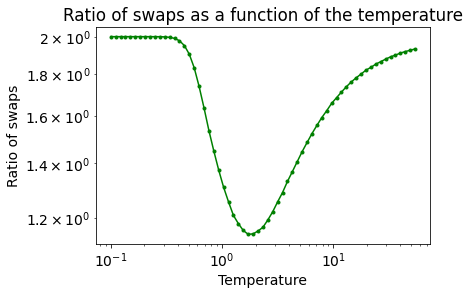

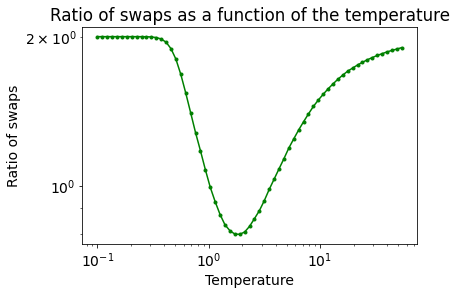

In [5]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

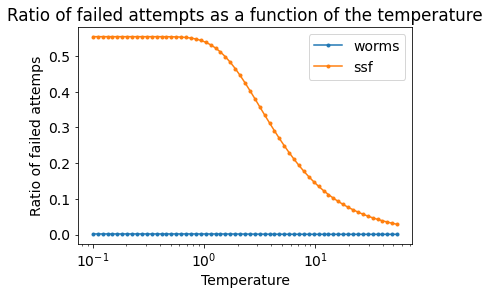

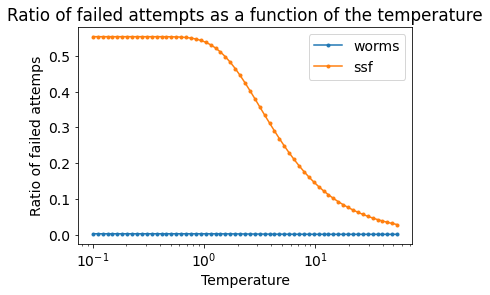

In [6]:
af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername,failed, failedssf)

In [7]:
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)

Verifying that the low temperatures of file  TipParams_L8_htip1_ttip0_path5_pswitch_1_uponlyTrue_folder/backup correspond to the ground state.
Phase 1:  True
Phase 2:  True
Phase 3:  True
Phase 4:  True
Phase 5:  True
Phase 6:  False
Phase 7:  False
Phase 8:  False
Phase 9:  False
Phase 10:  False
Phase 11:  False
Verifying that the low temperatures of file  TipParams_L12_htip1_ttip0_path5_pswitch_1_uponlyTrue_folder/backup correspond to the ground state.
Phase 1:  True
Phase 2:  True
Phase 3:  True
Phase 4:  True
Phase 5:  True
Phase 6:  False
Phase 7:  False
Phase 8:  False
Phase 9:  False
Phase 10:  False
Phase 11:  False


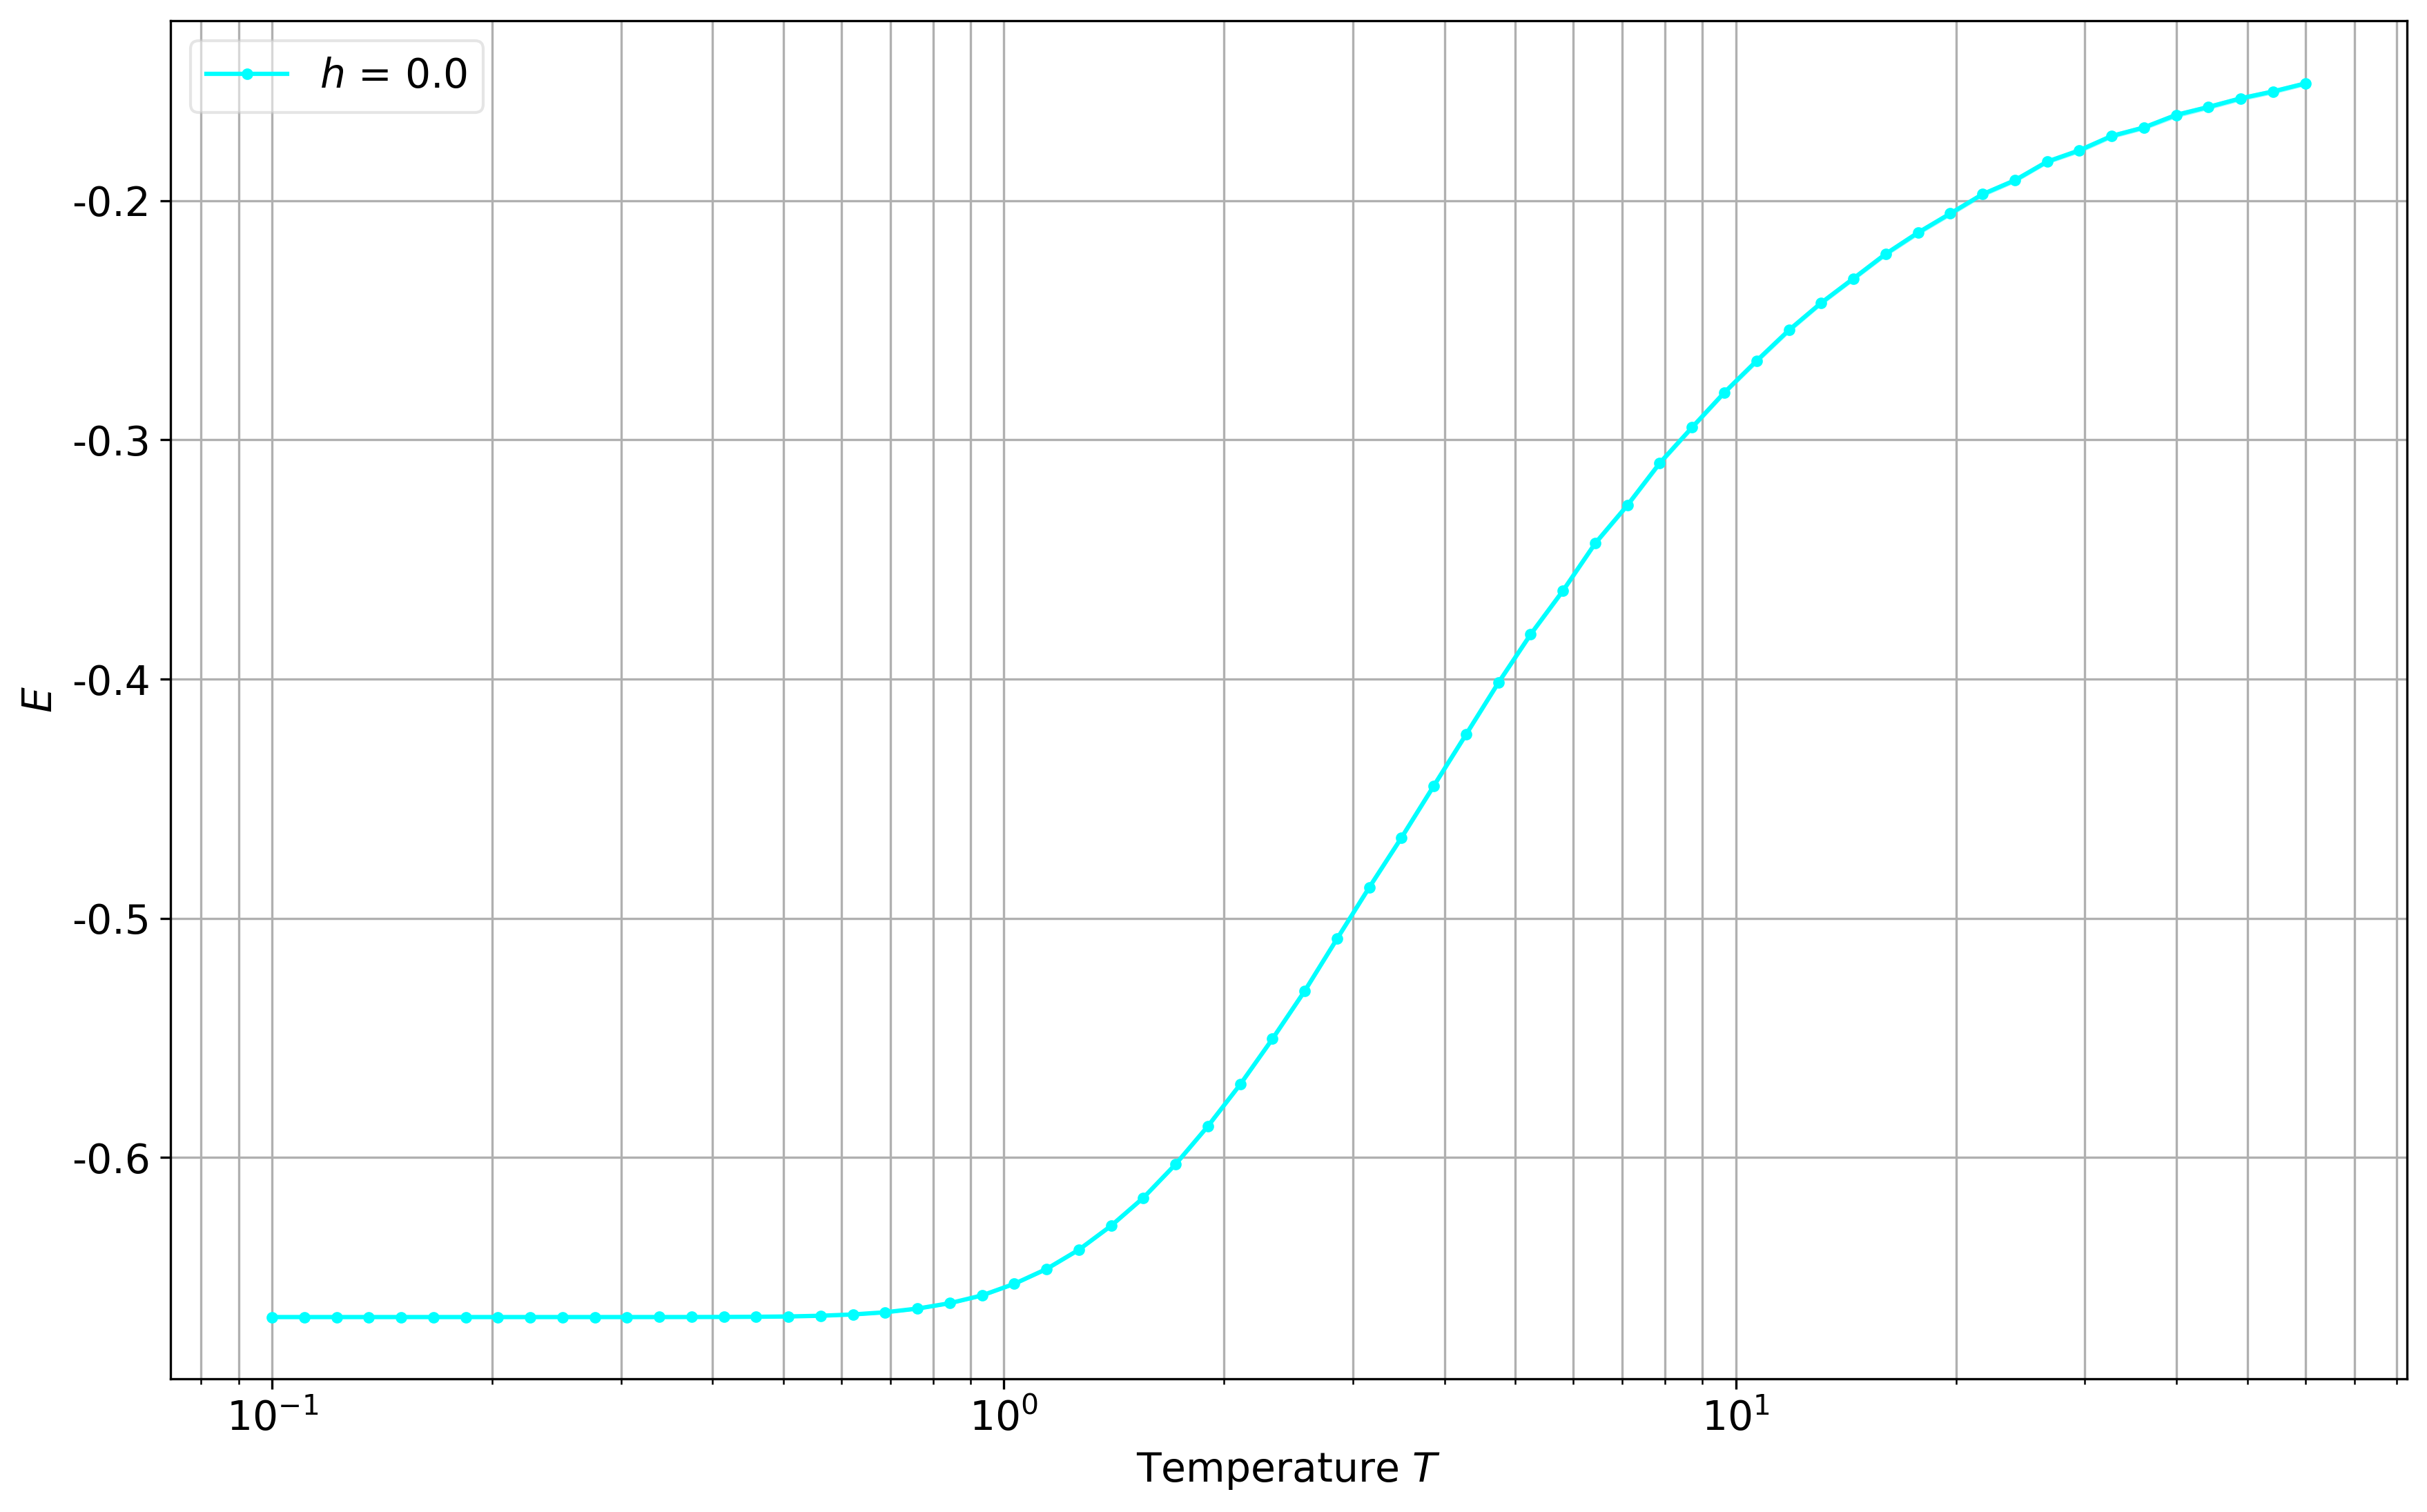

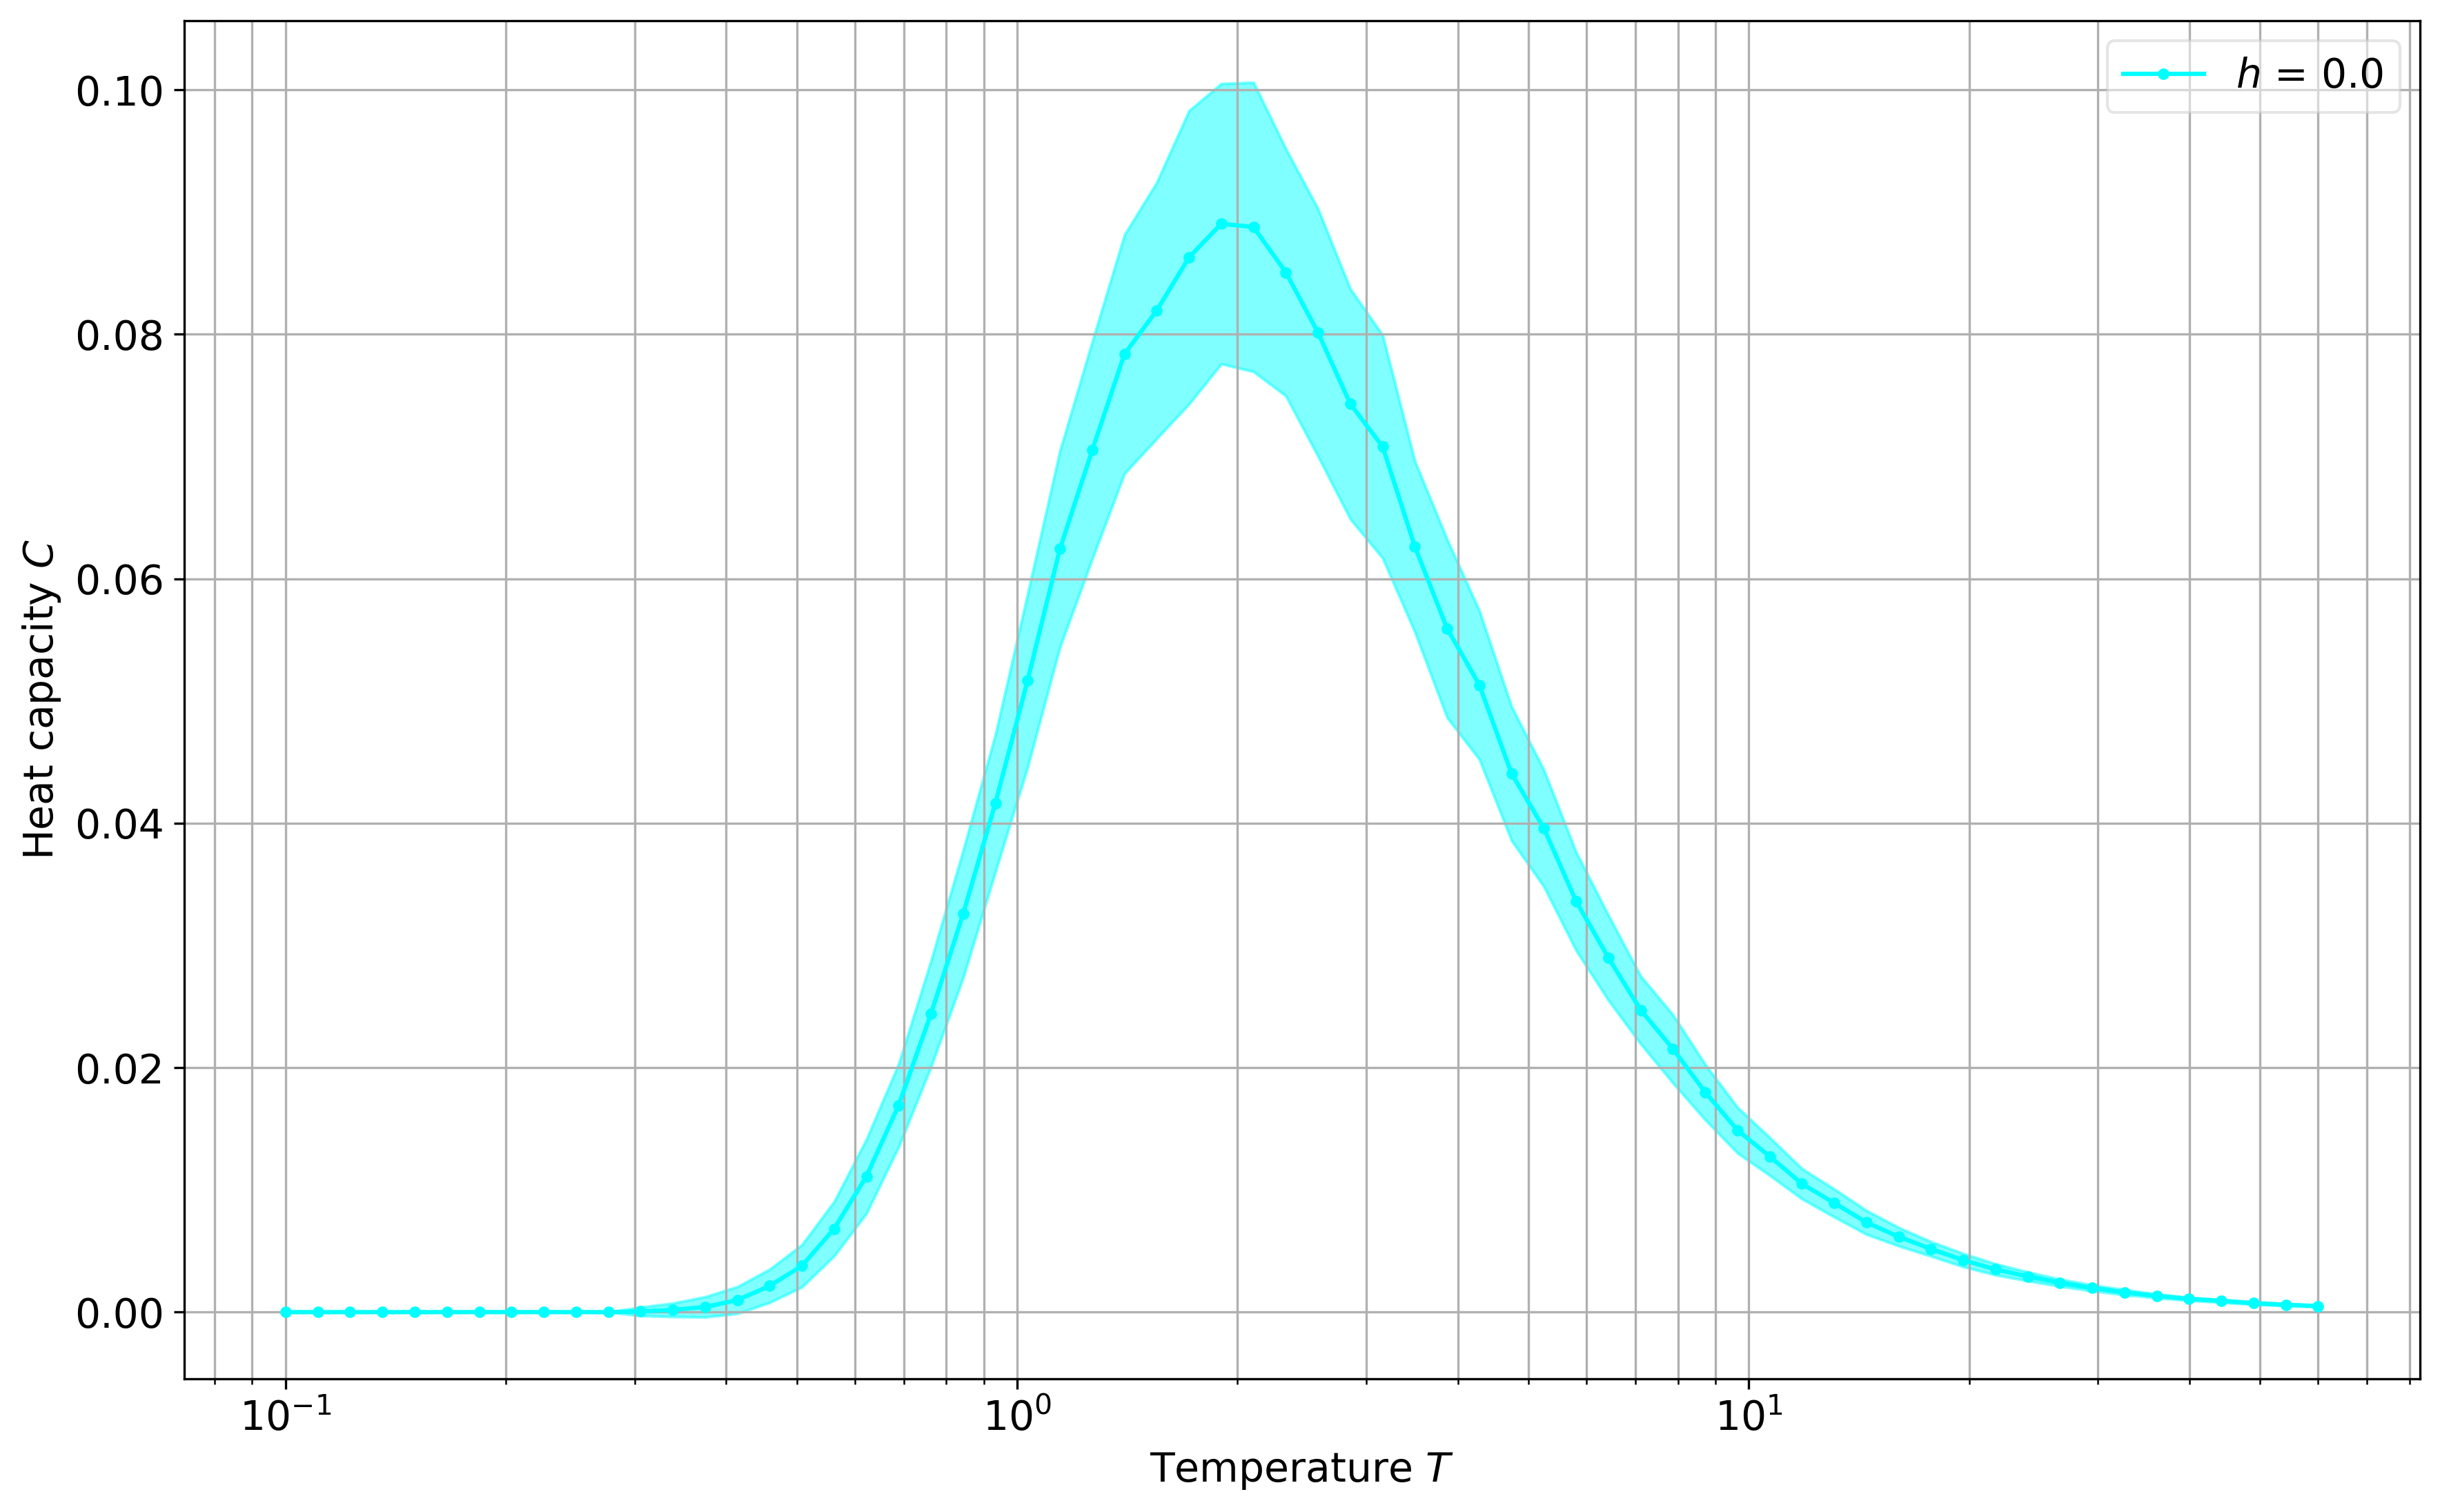

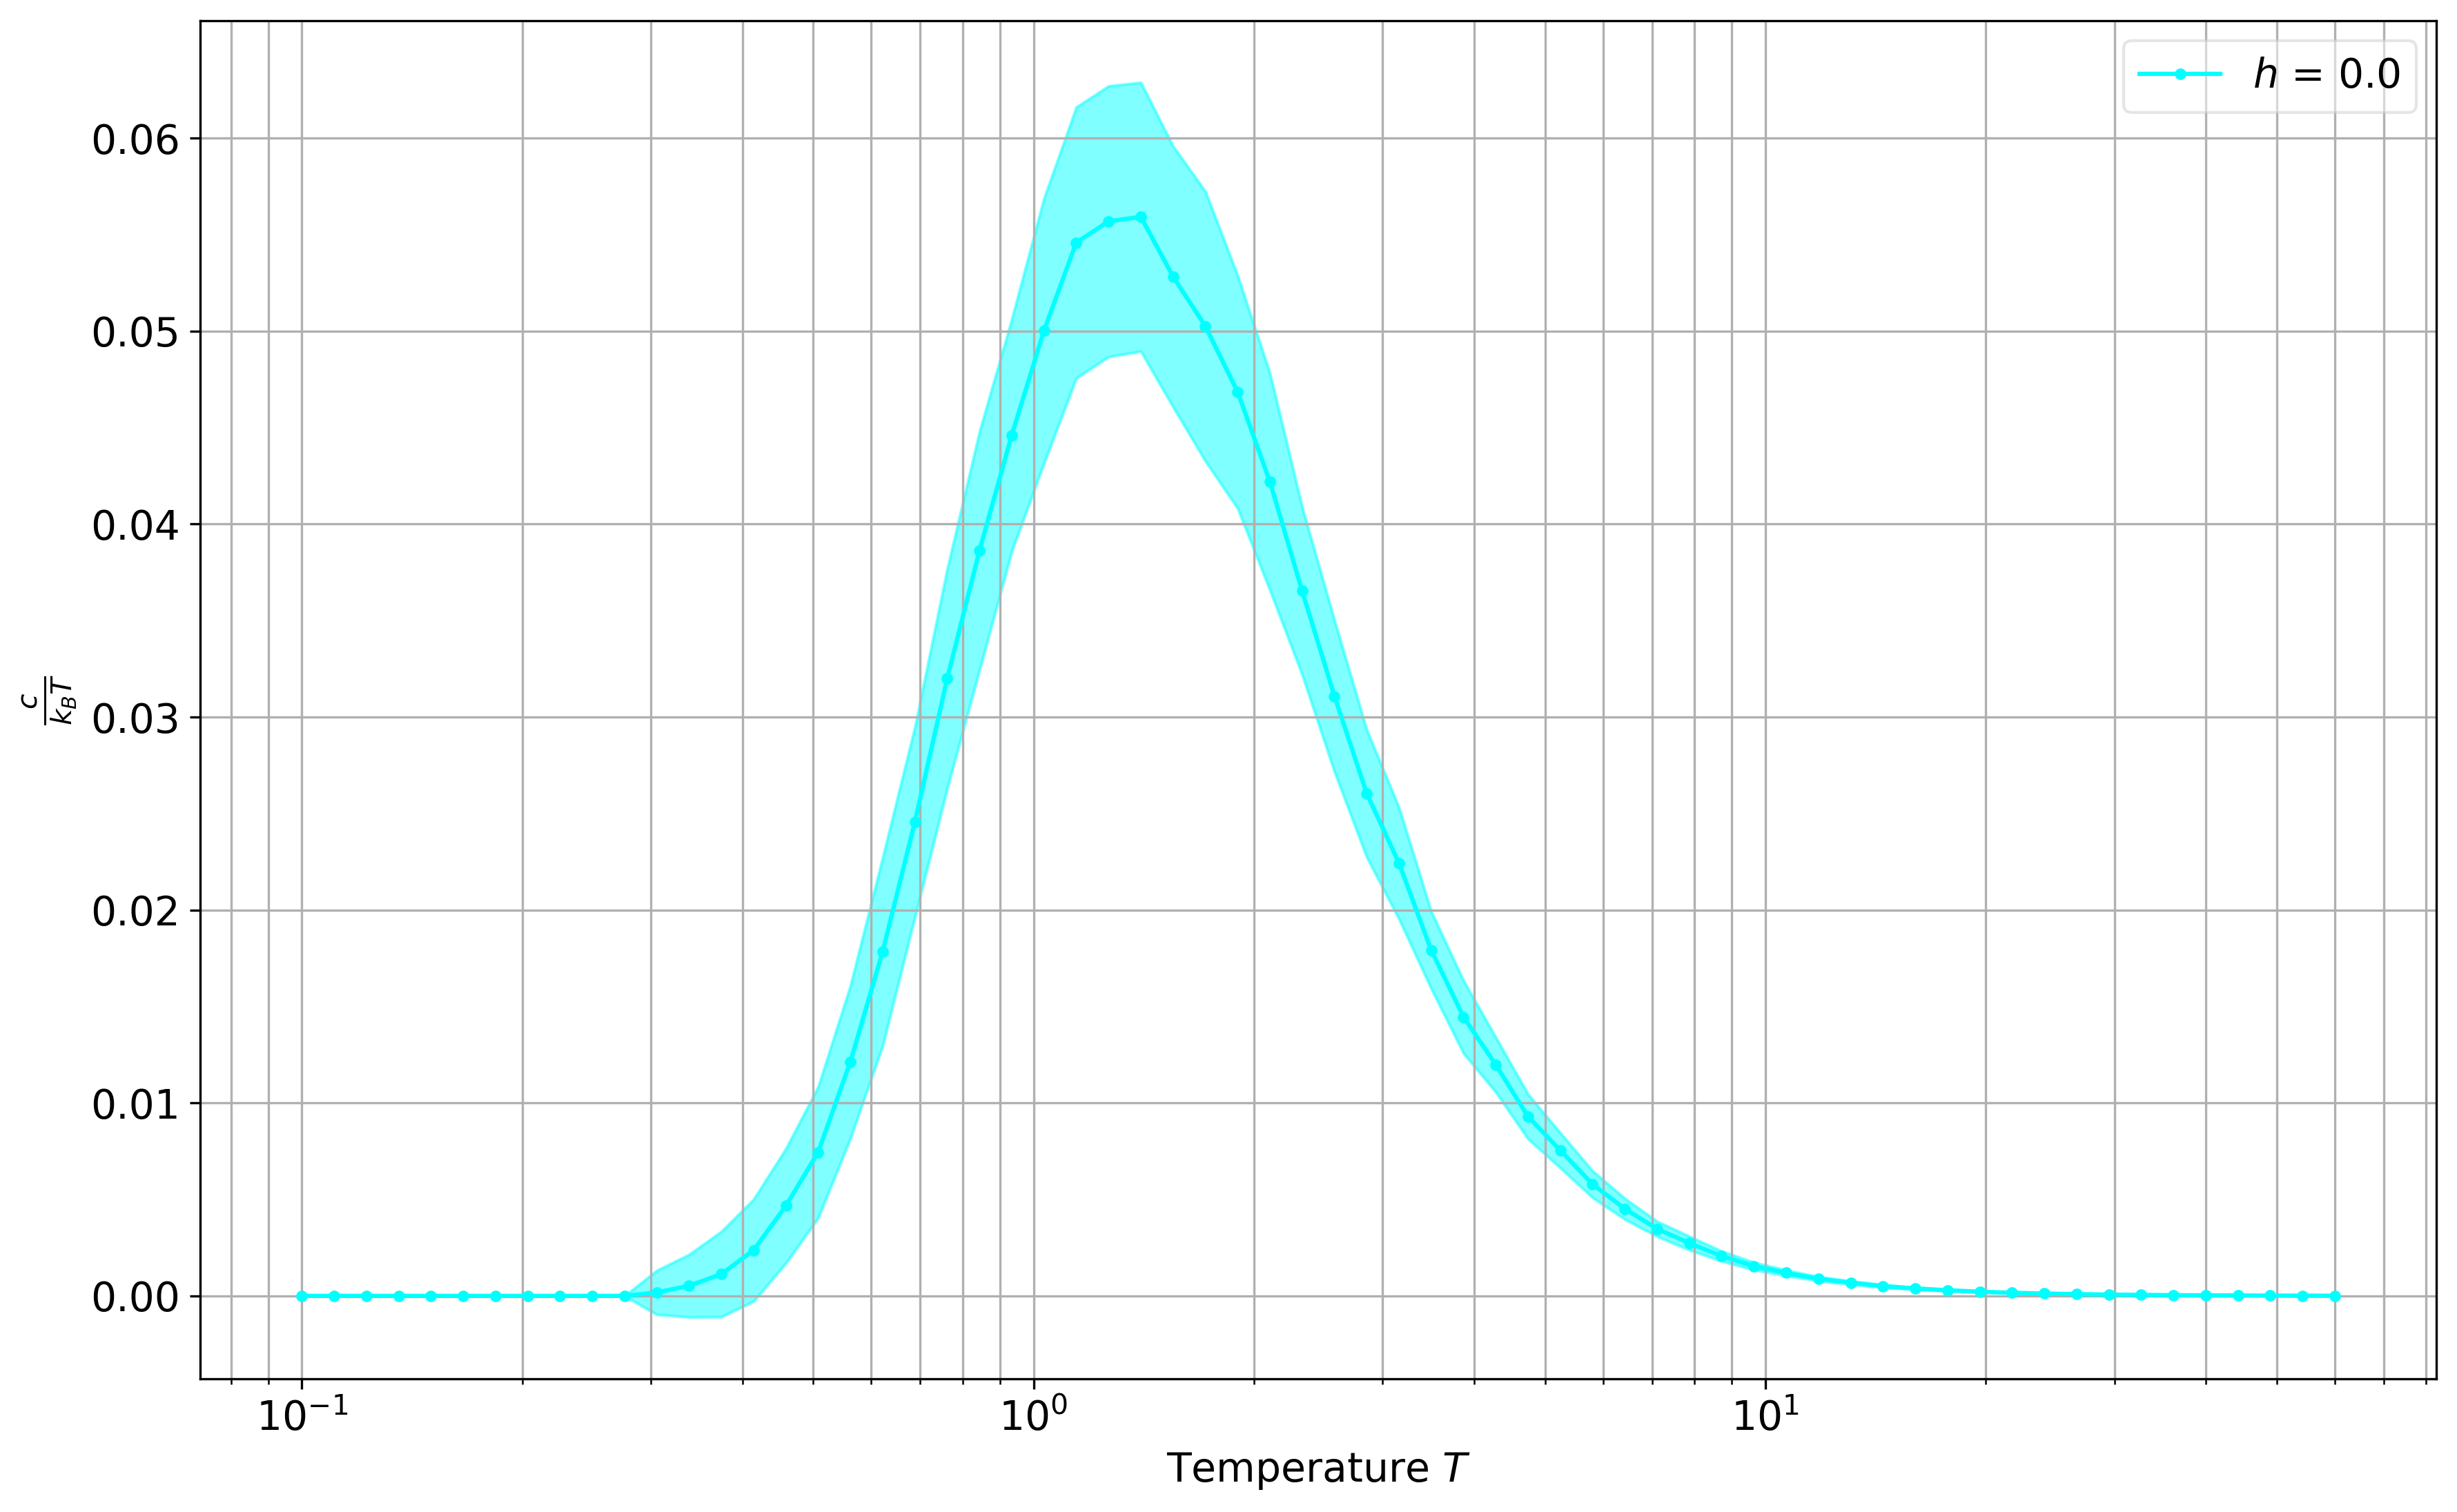

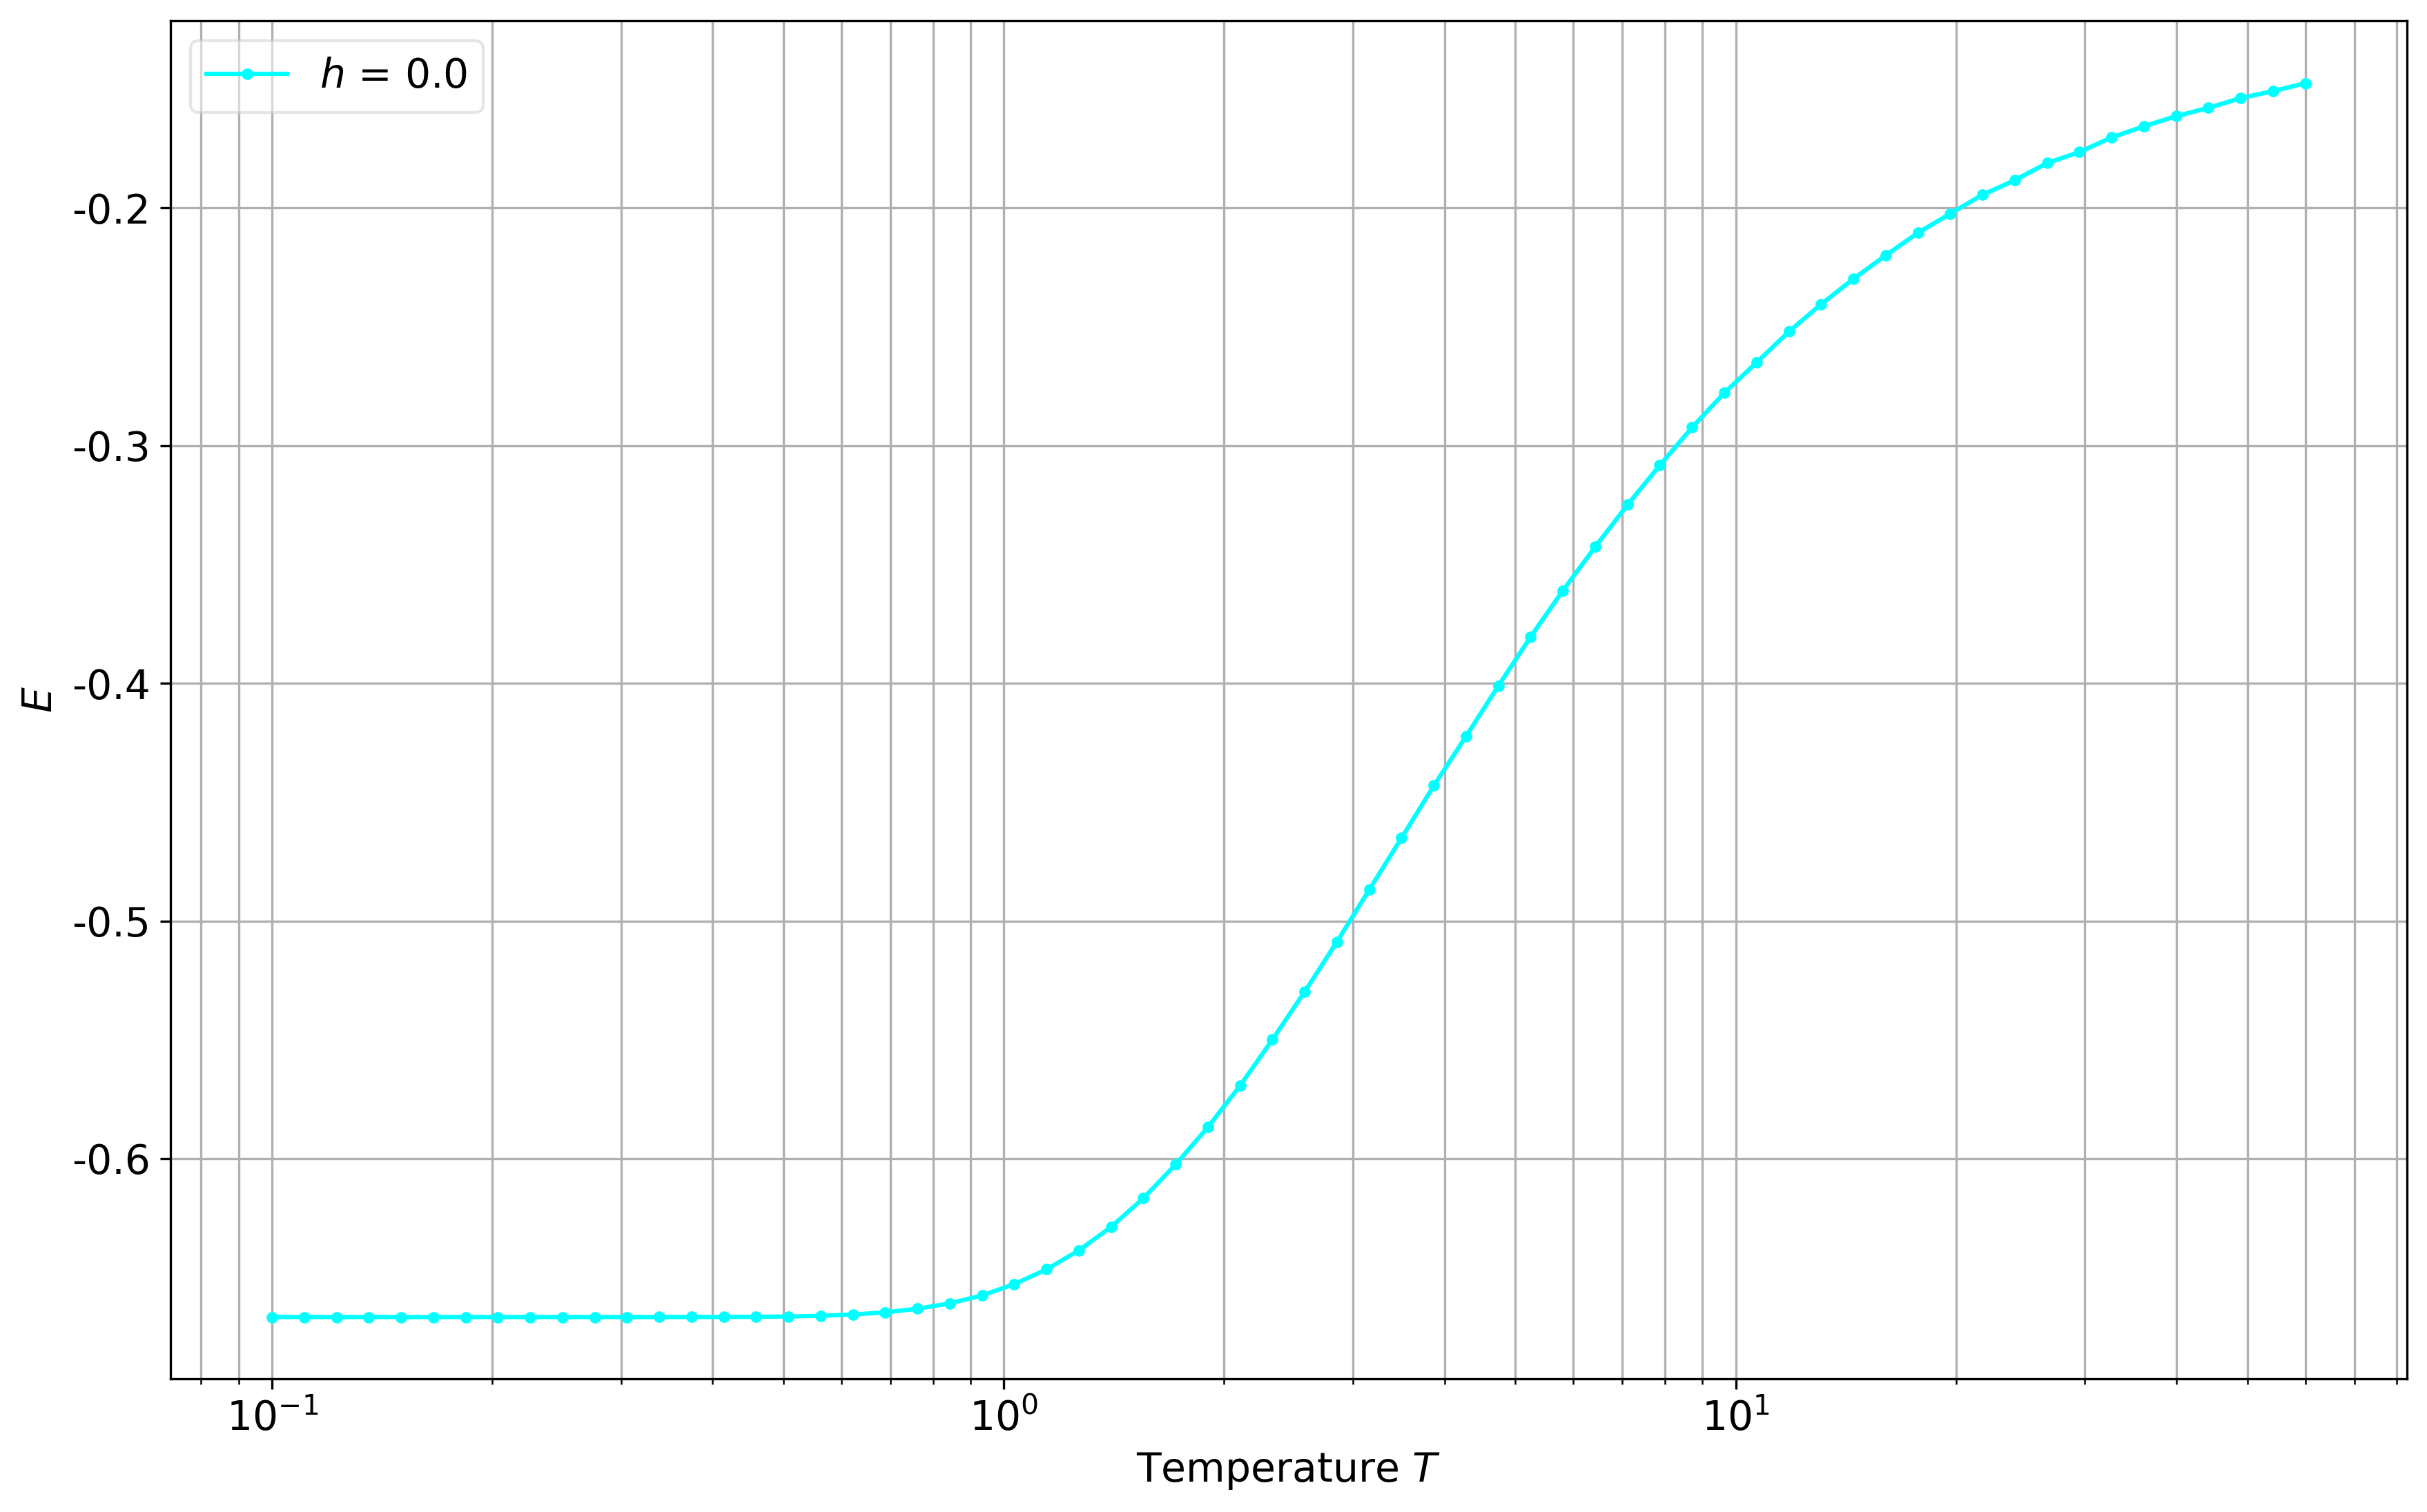

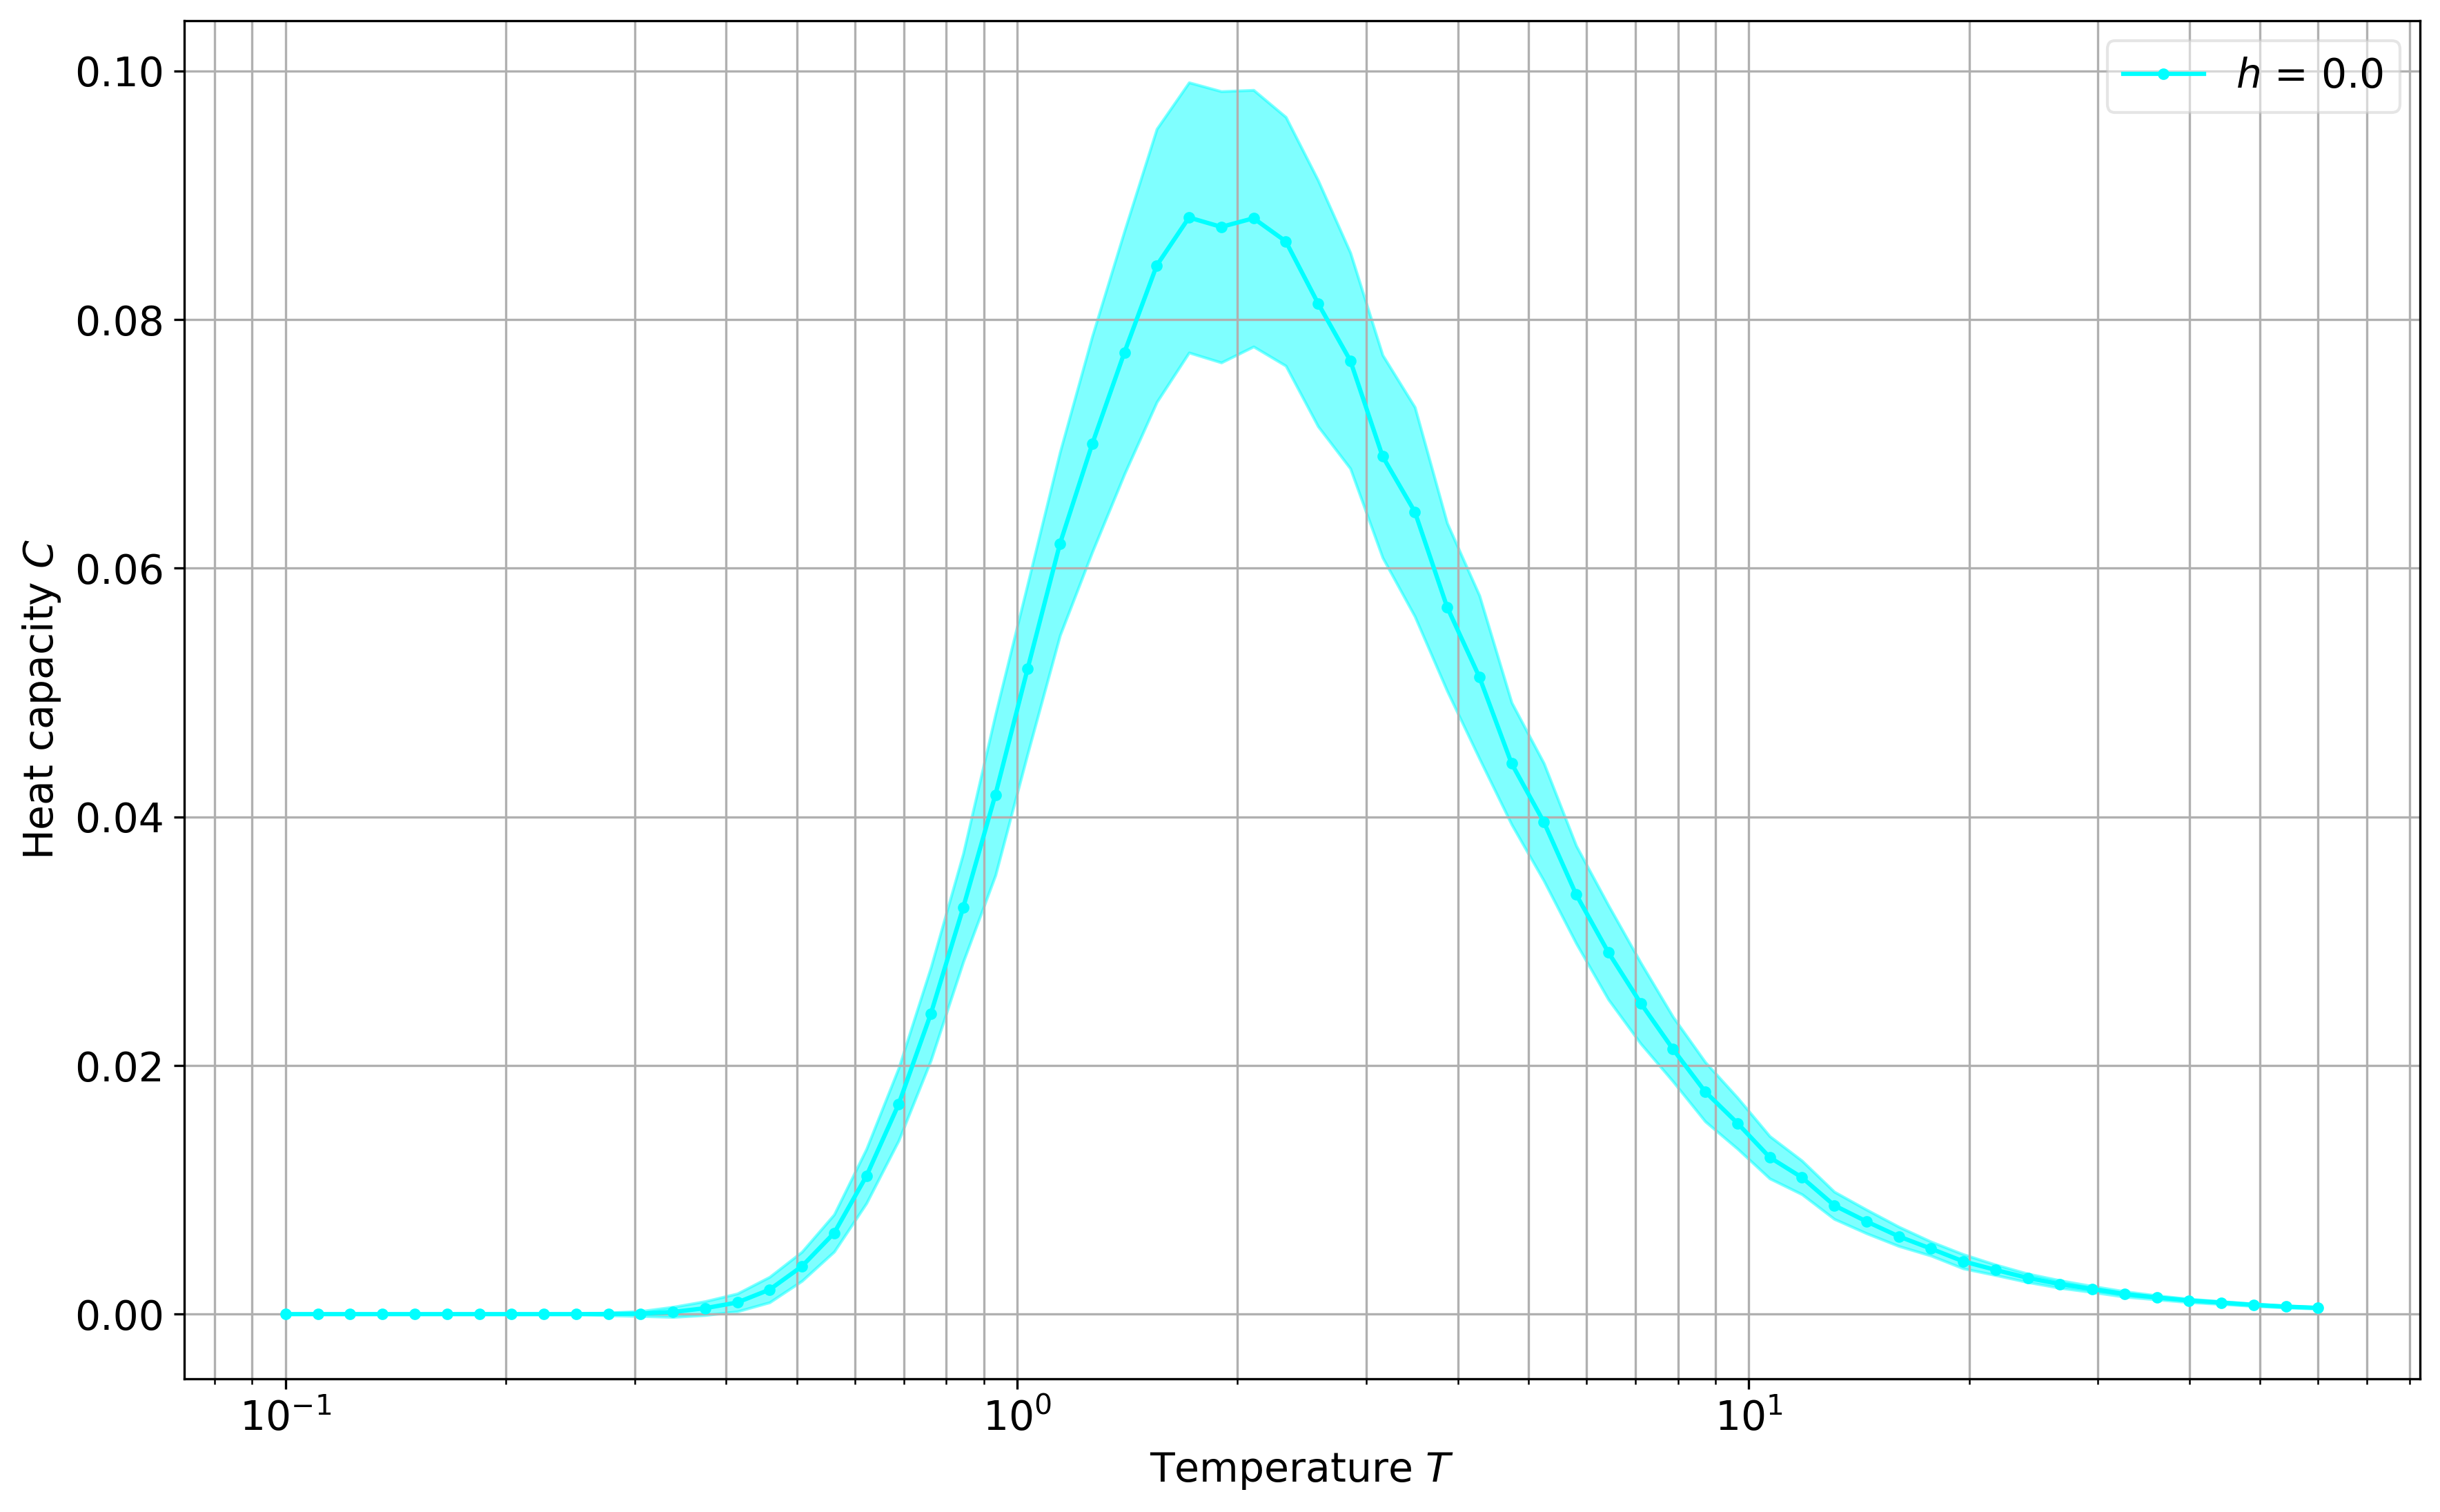

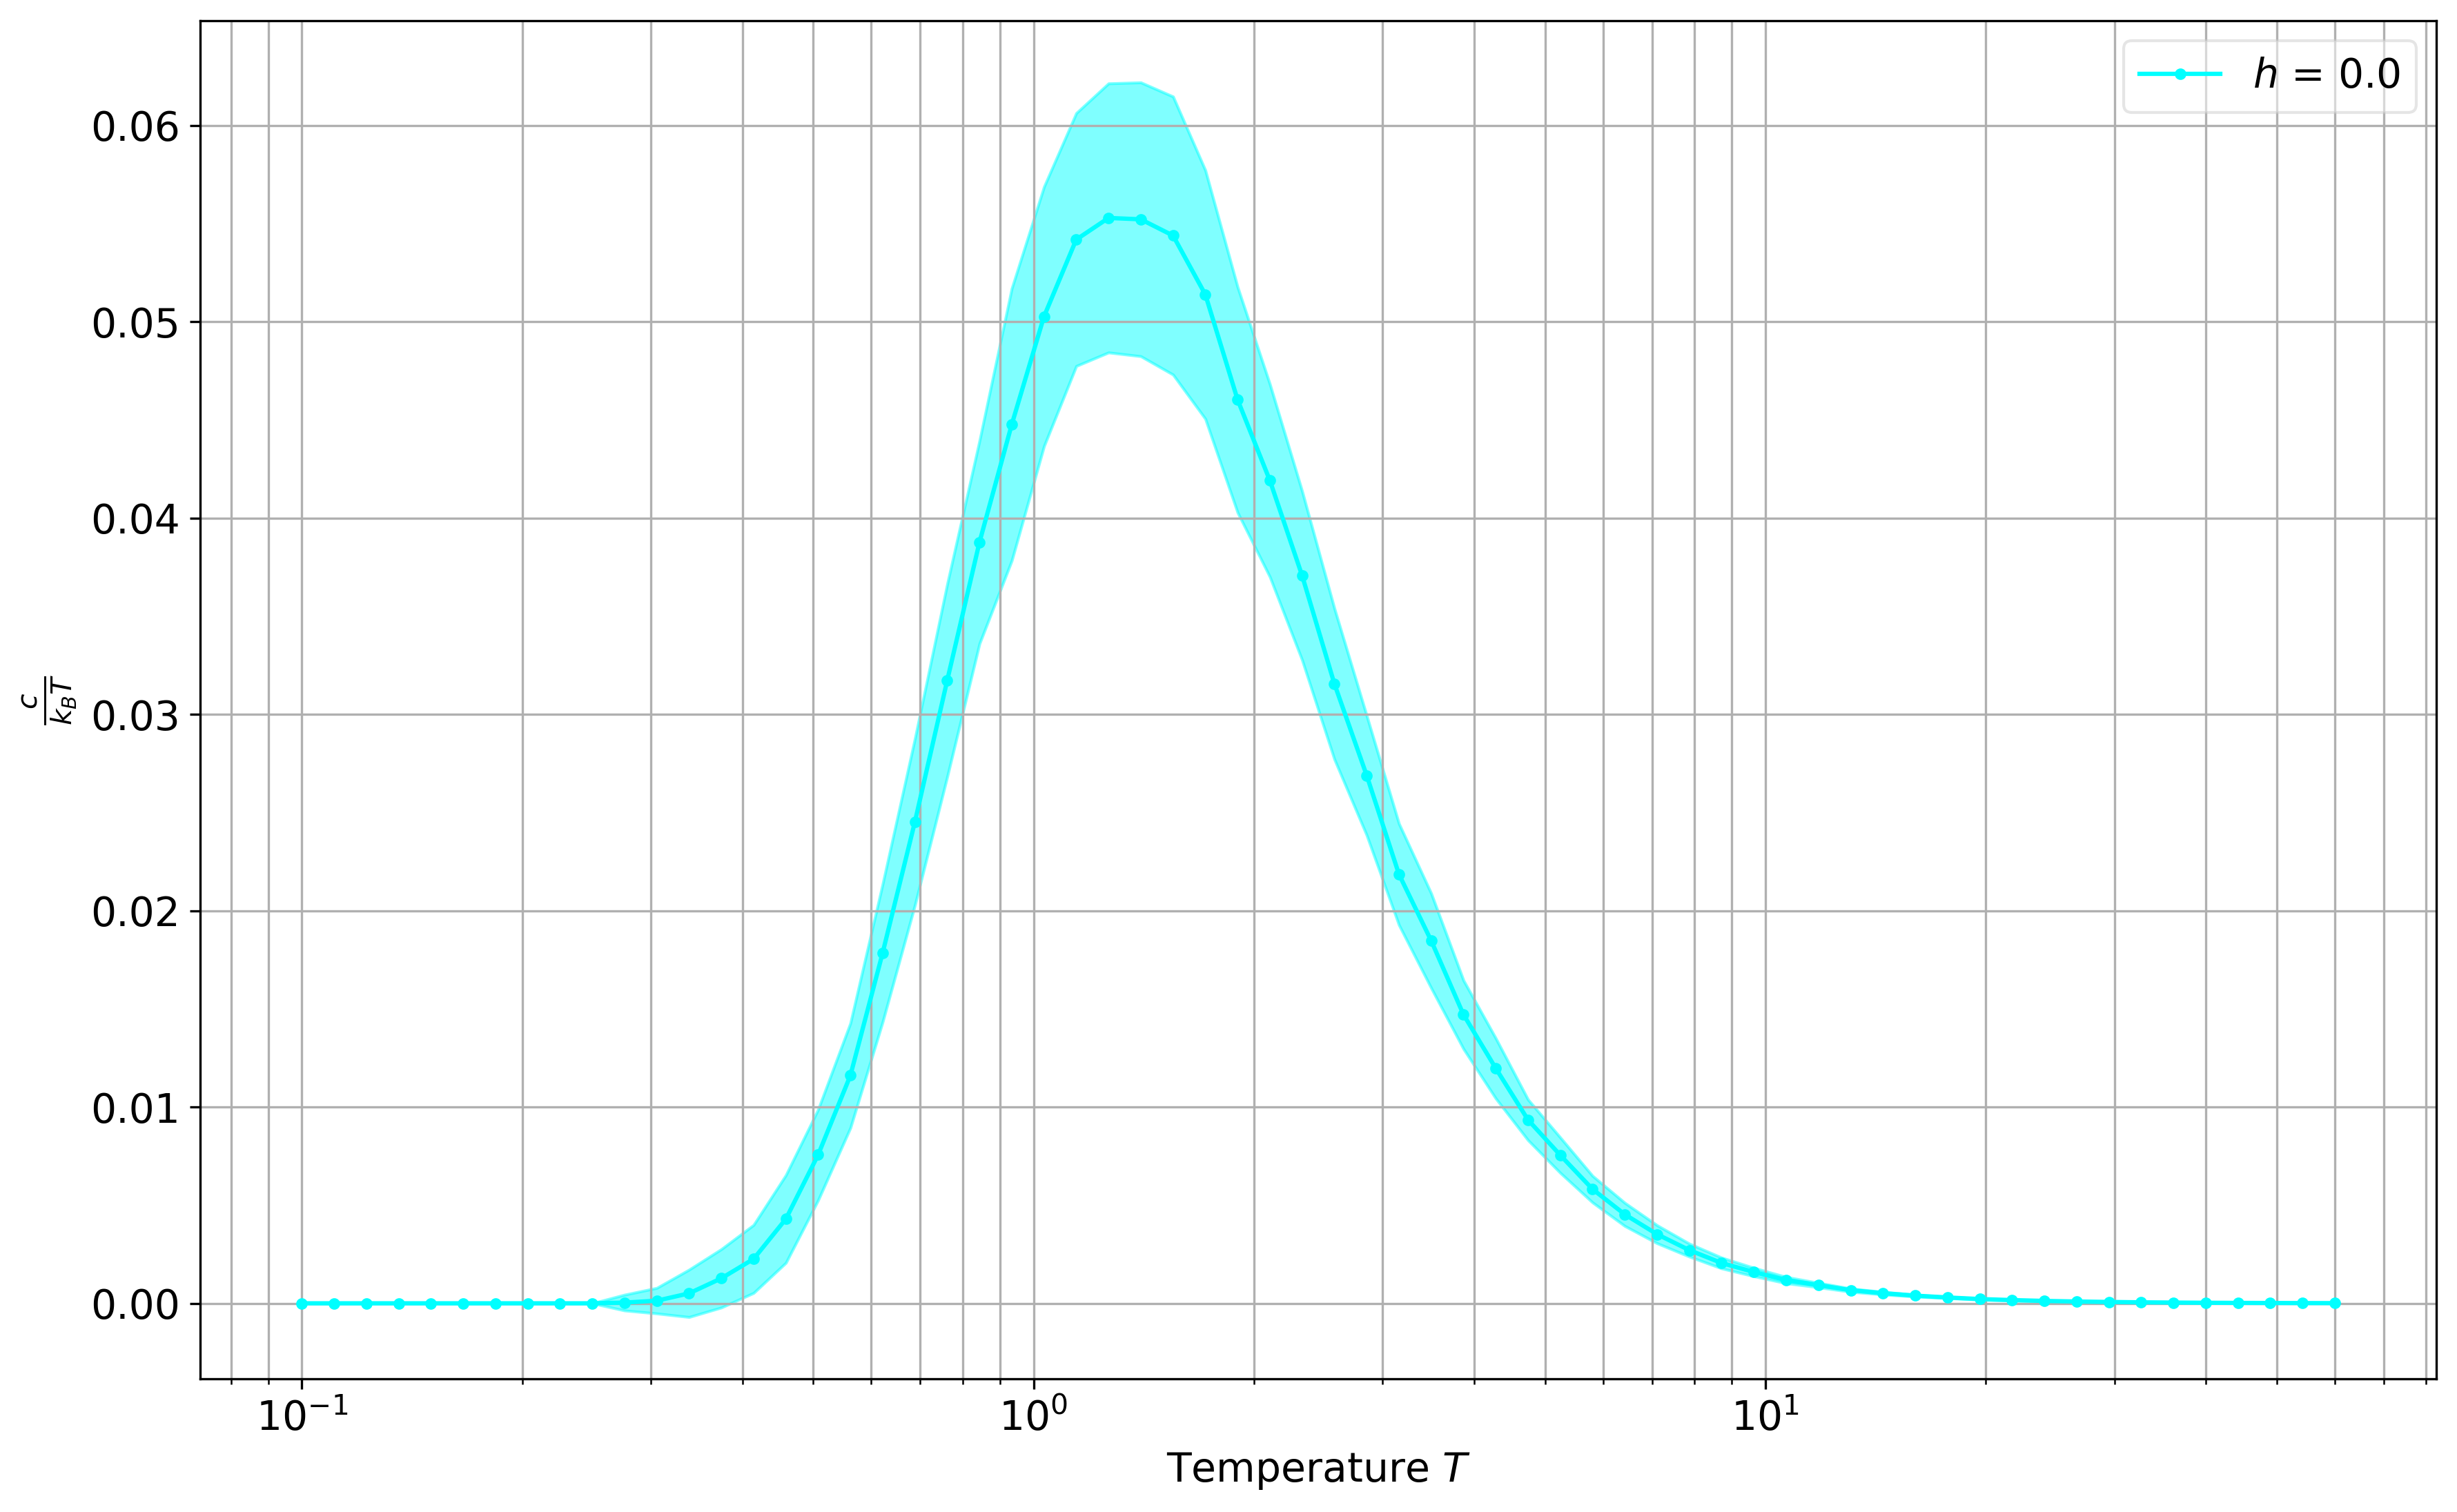

In [8]:
###########################################
        ## Energy ANALYSIS ##
###########################################
### Energy
S0 = np.log(2)

for i in range(n):
    addsave = "ht={0}_Ttip={1}_uponly={2}_pswitch={3}_path={4}_L={5}".format(
        htip[i],Ttip[i], uponly[i], pswitch[i], path[i], L[i]);
    kw = {'gscheck': True, 'addsave': addsave}
    af.BasicPlotsE(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4,  **kw)
plt.show()

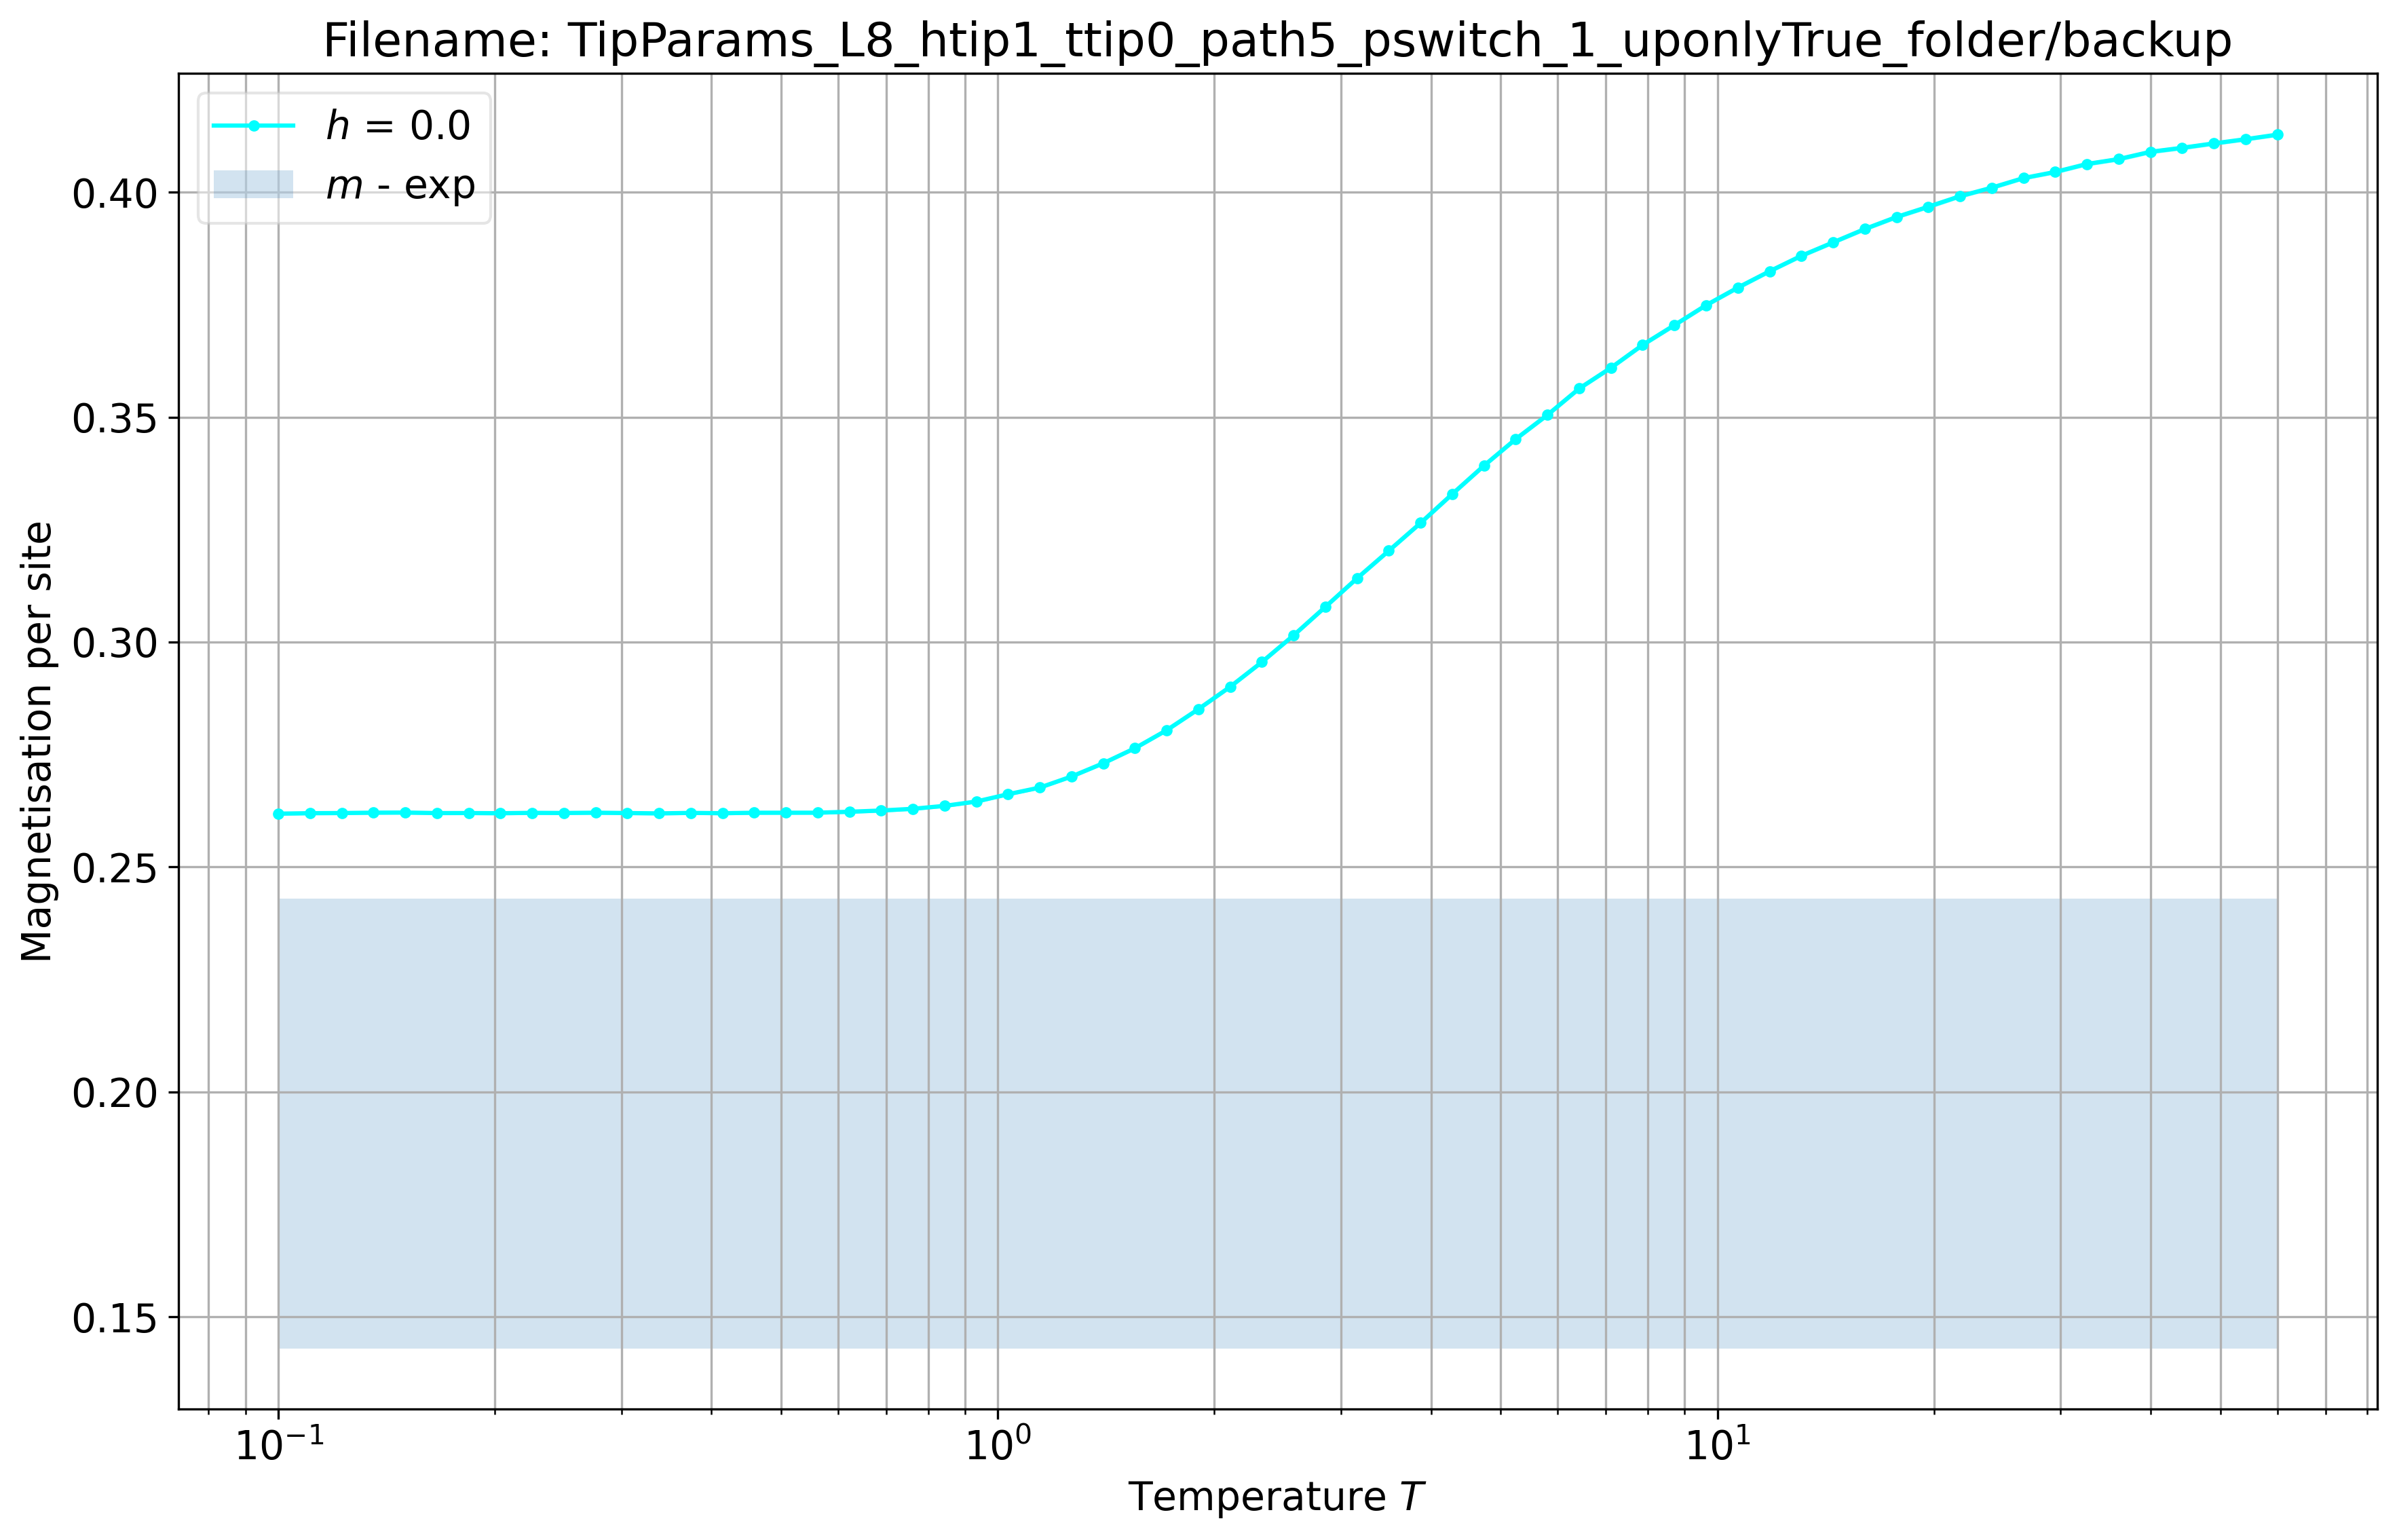

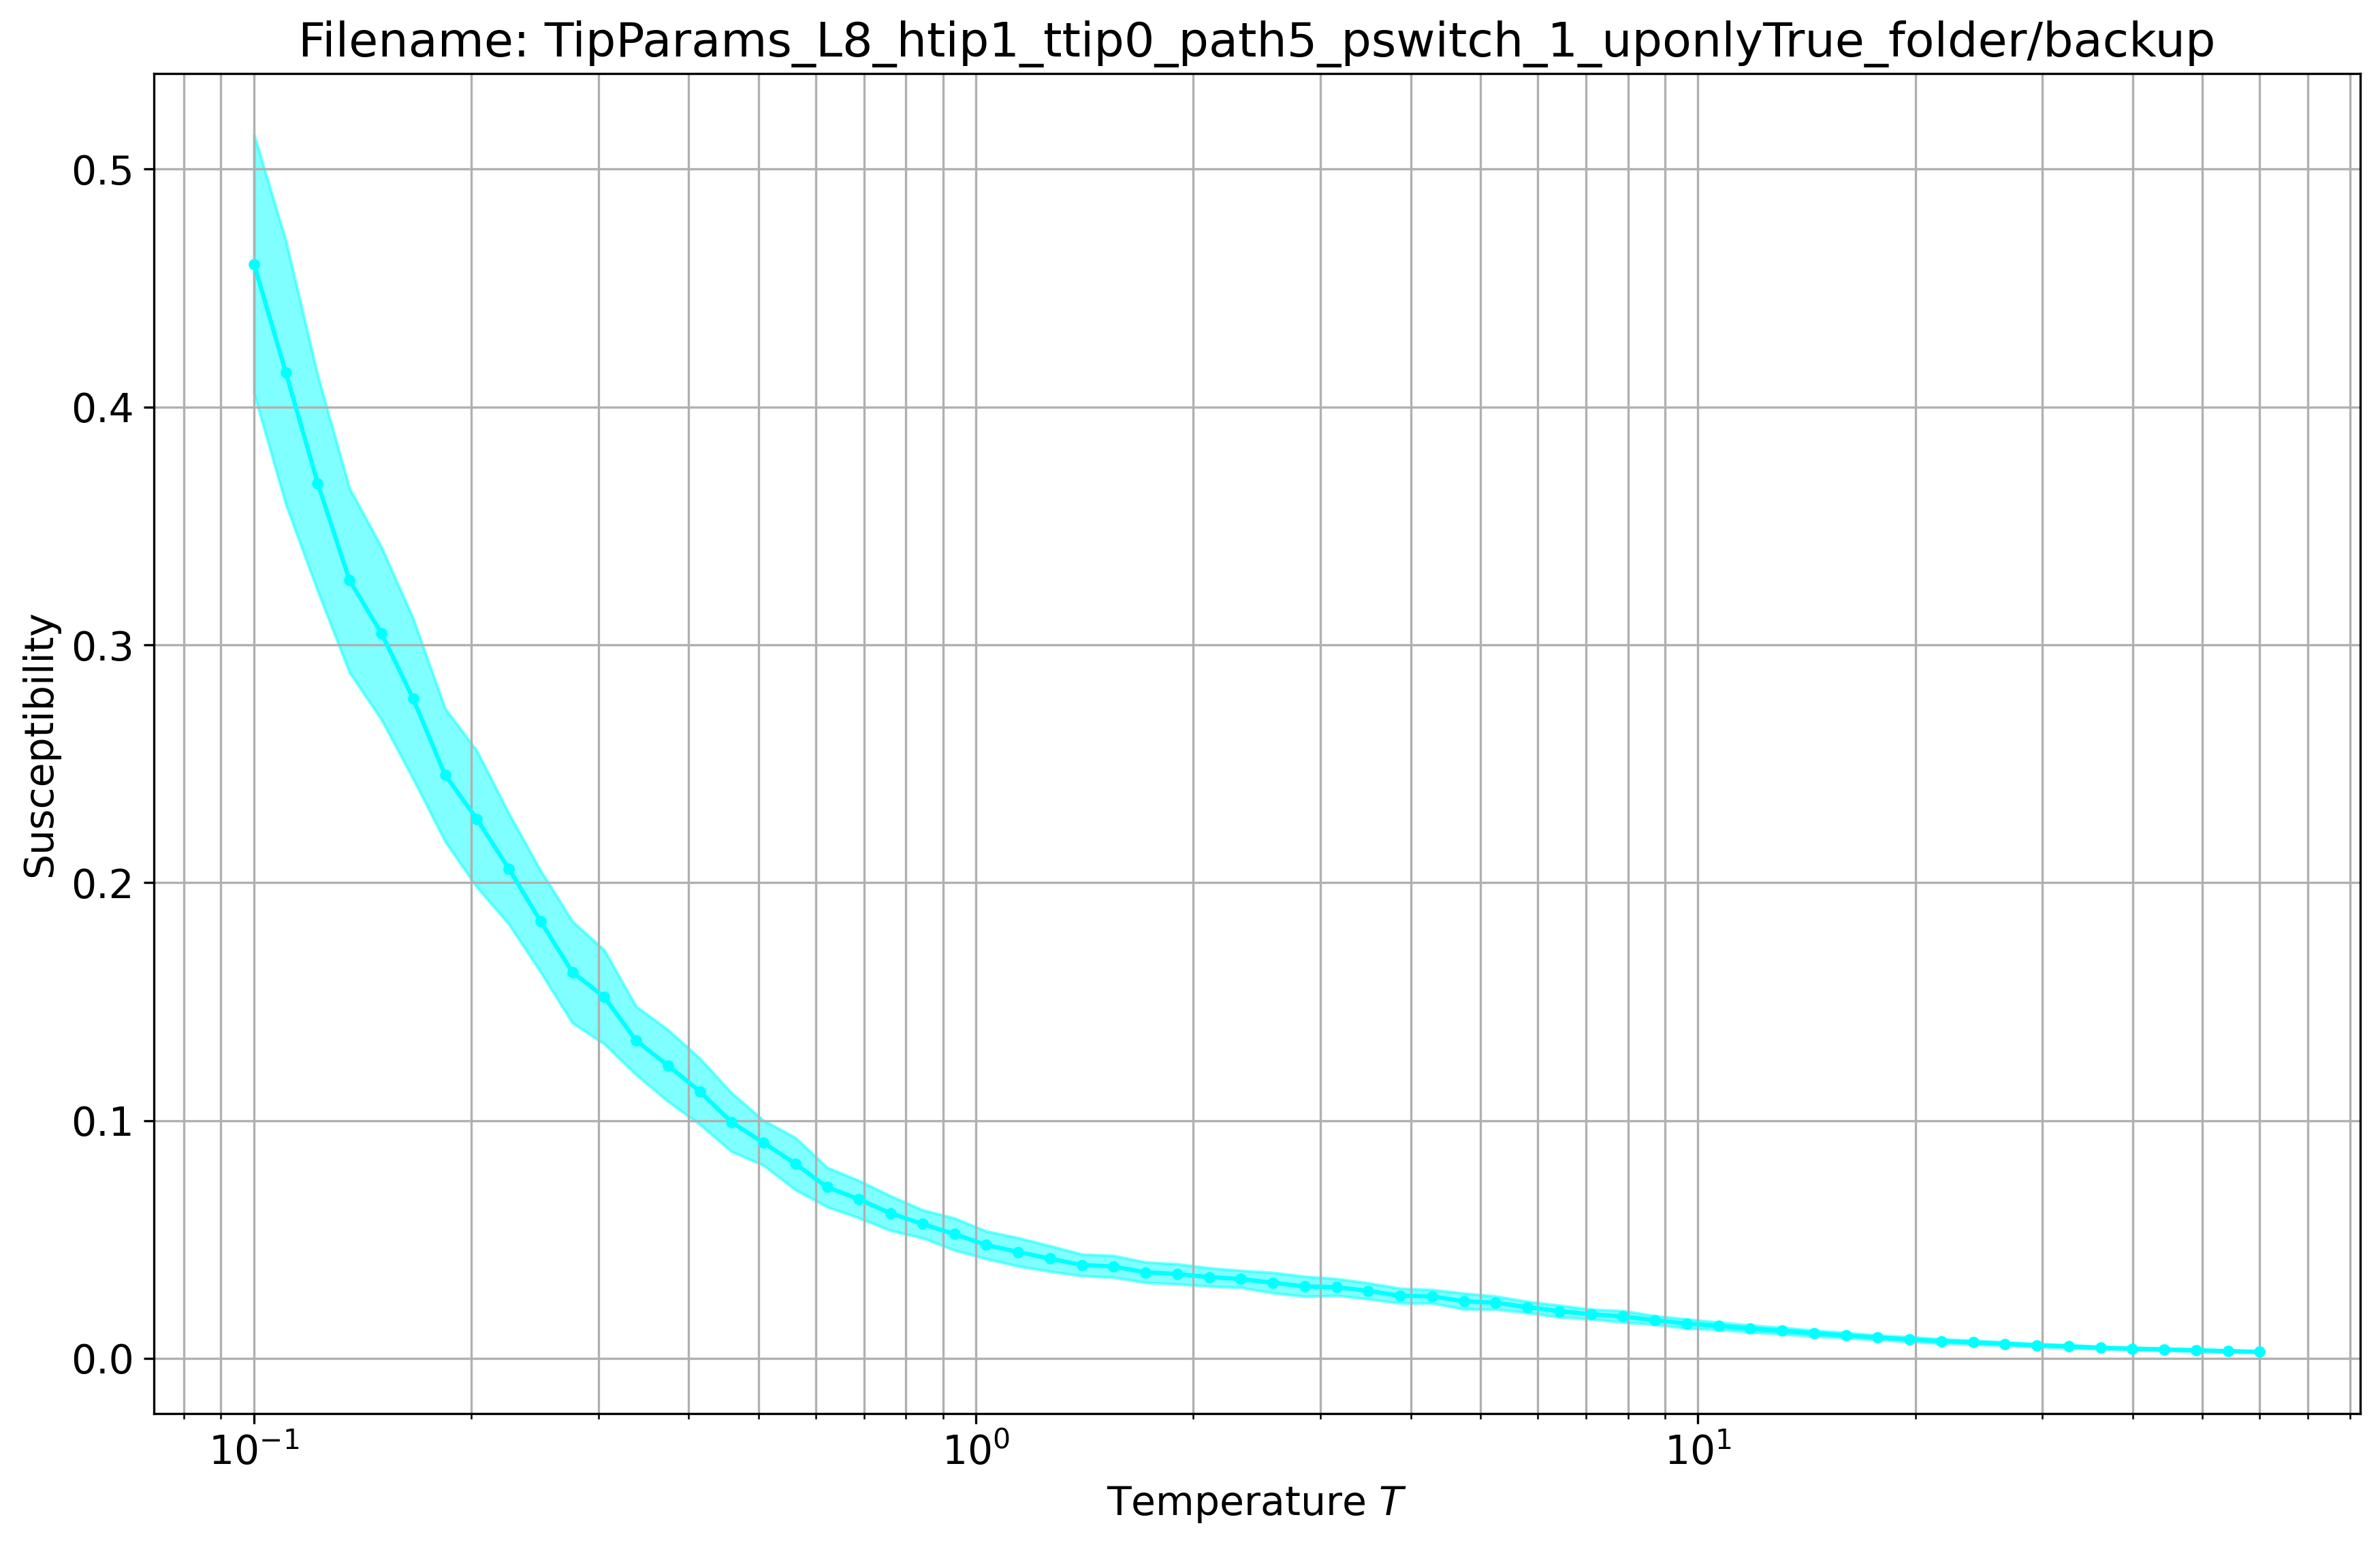

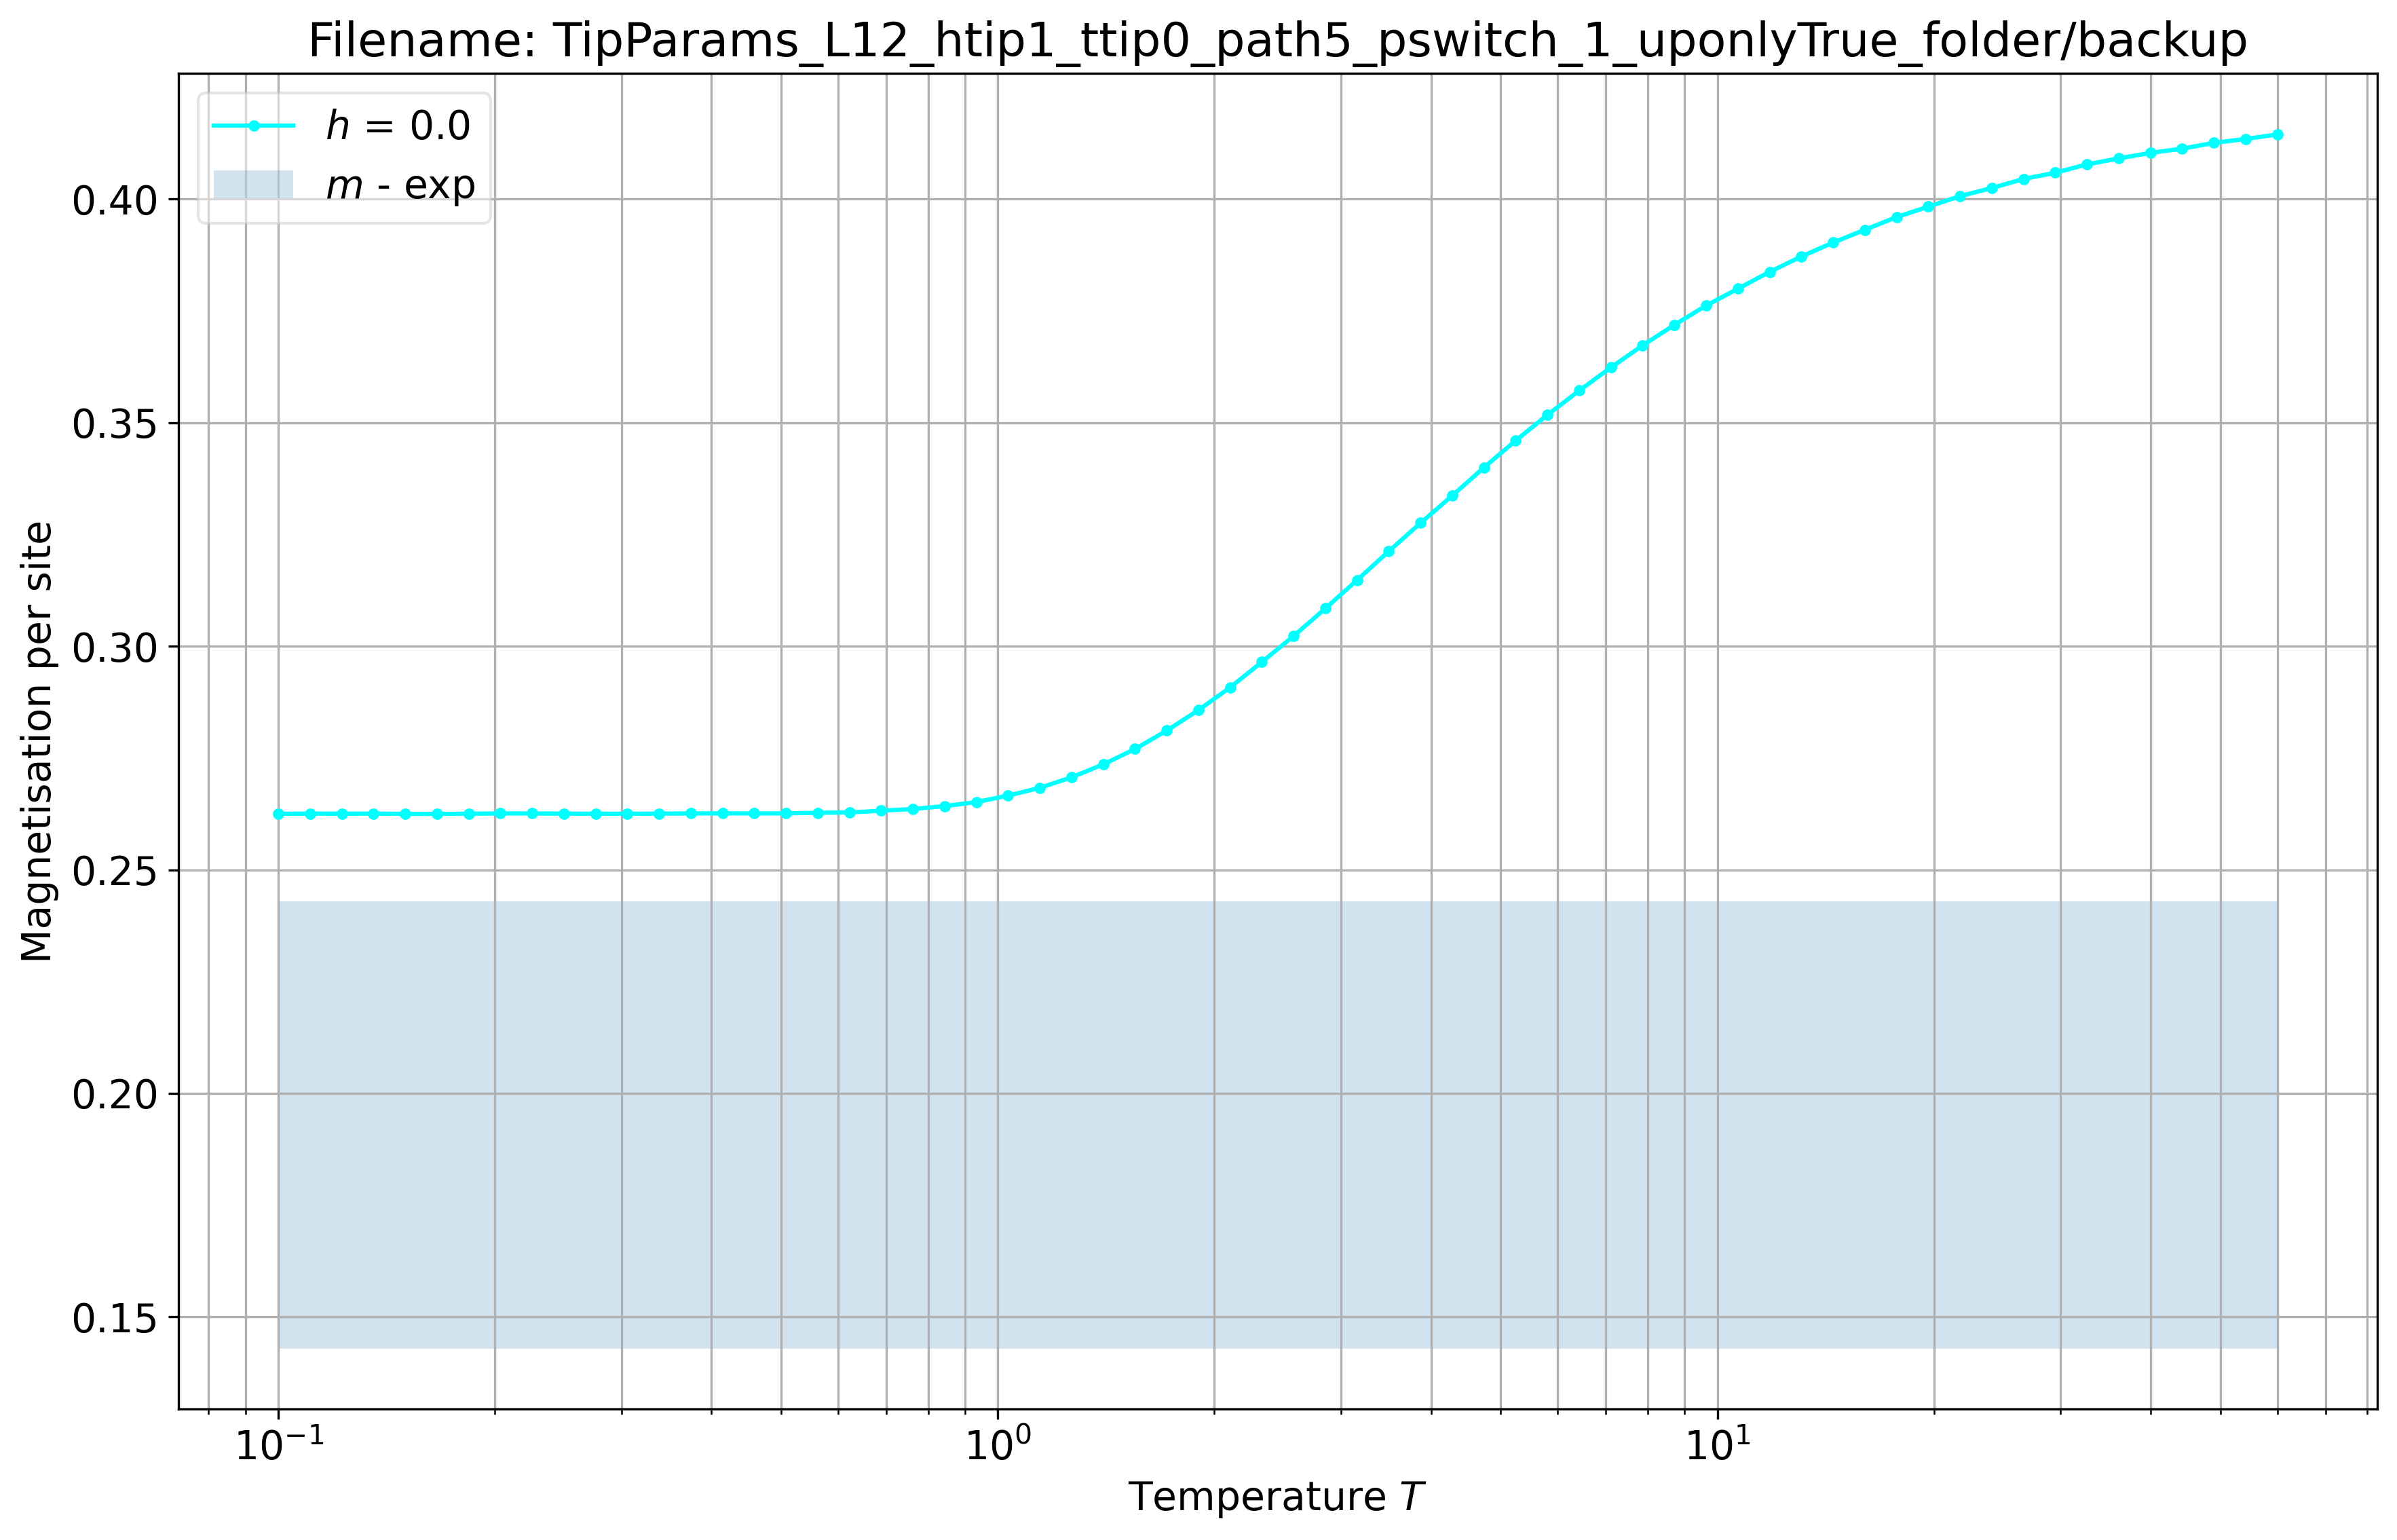

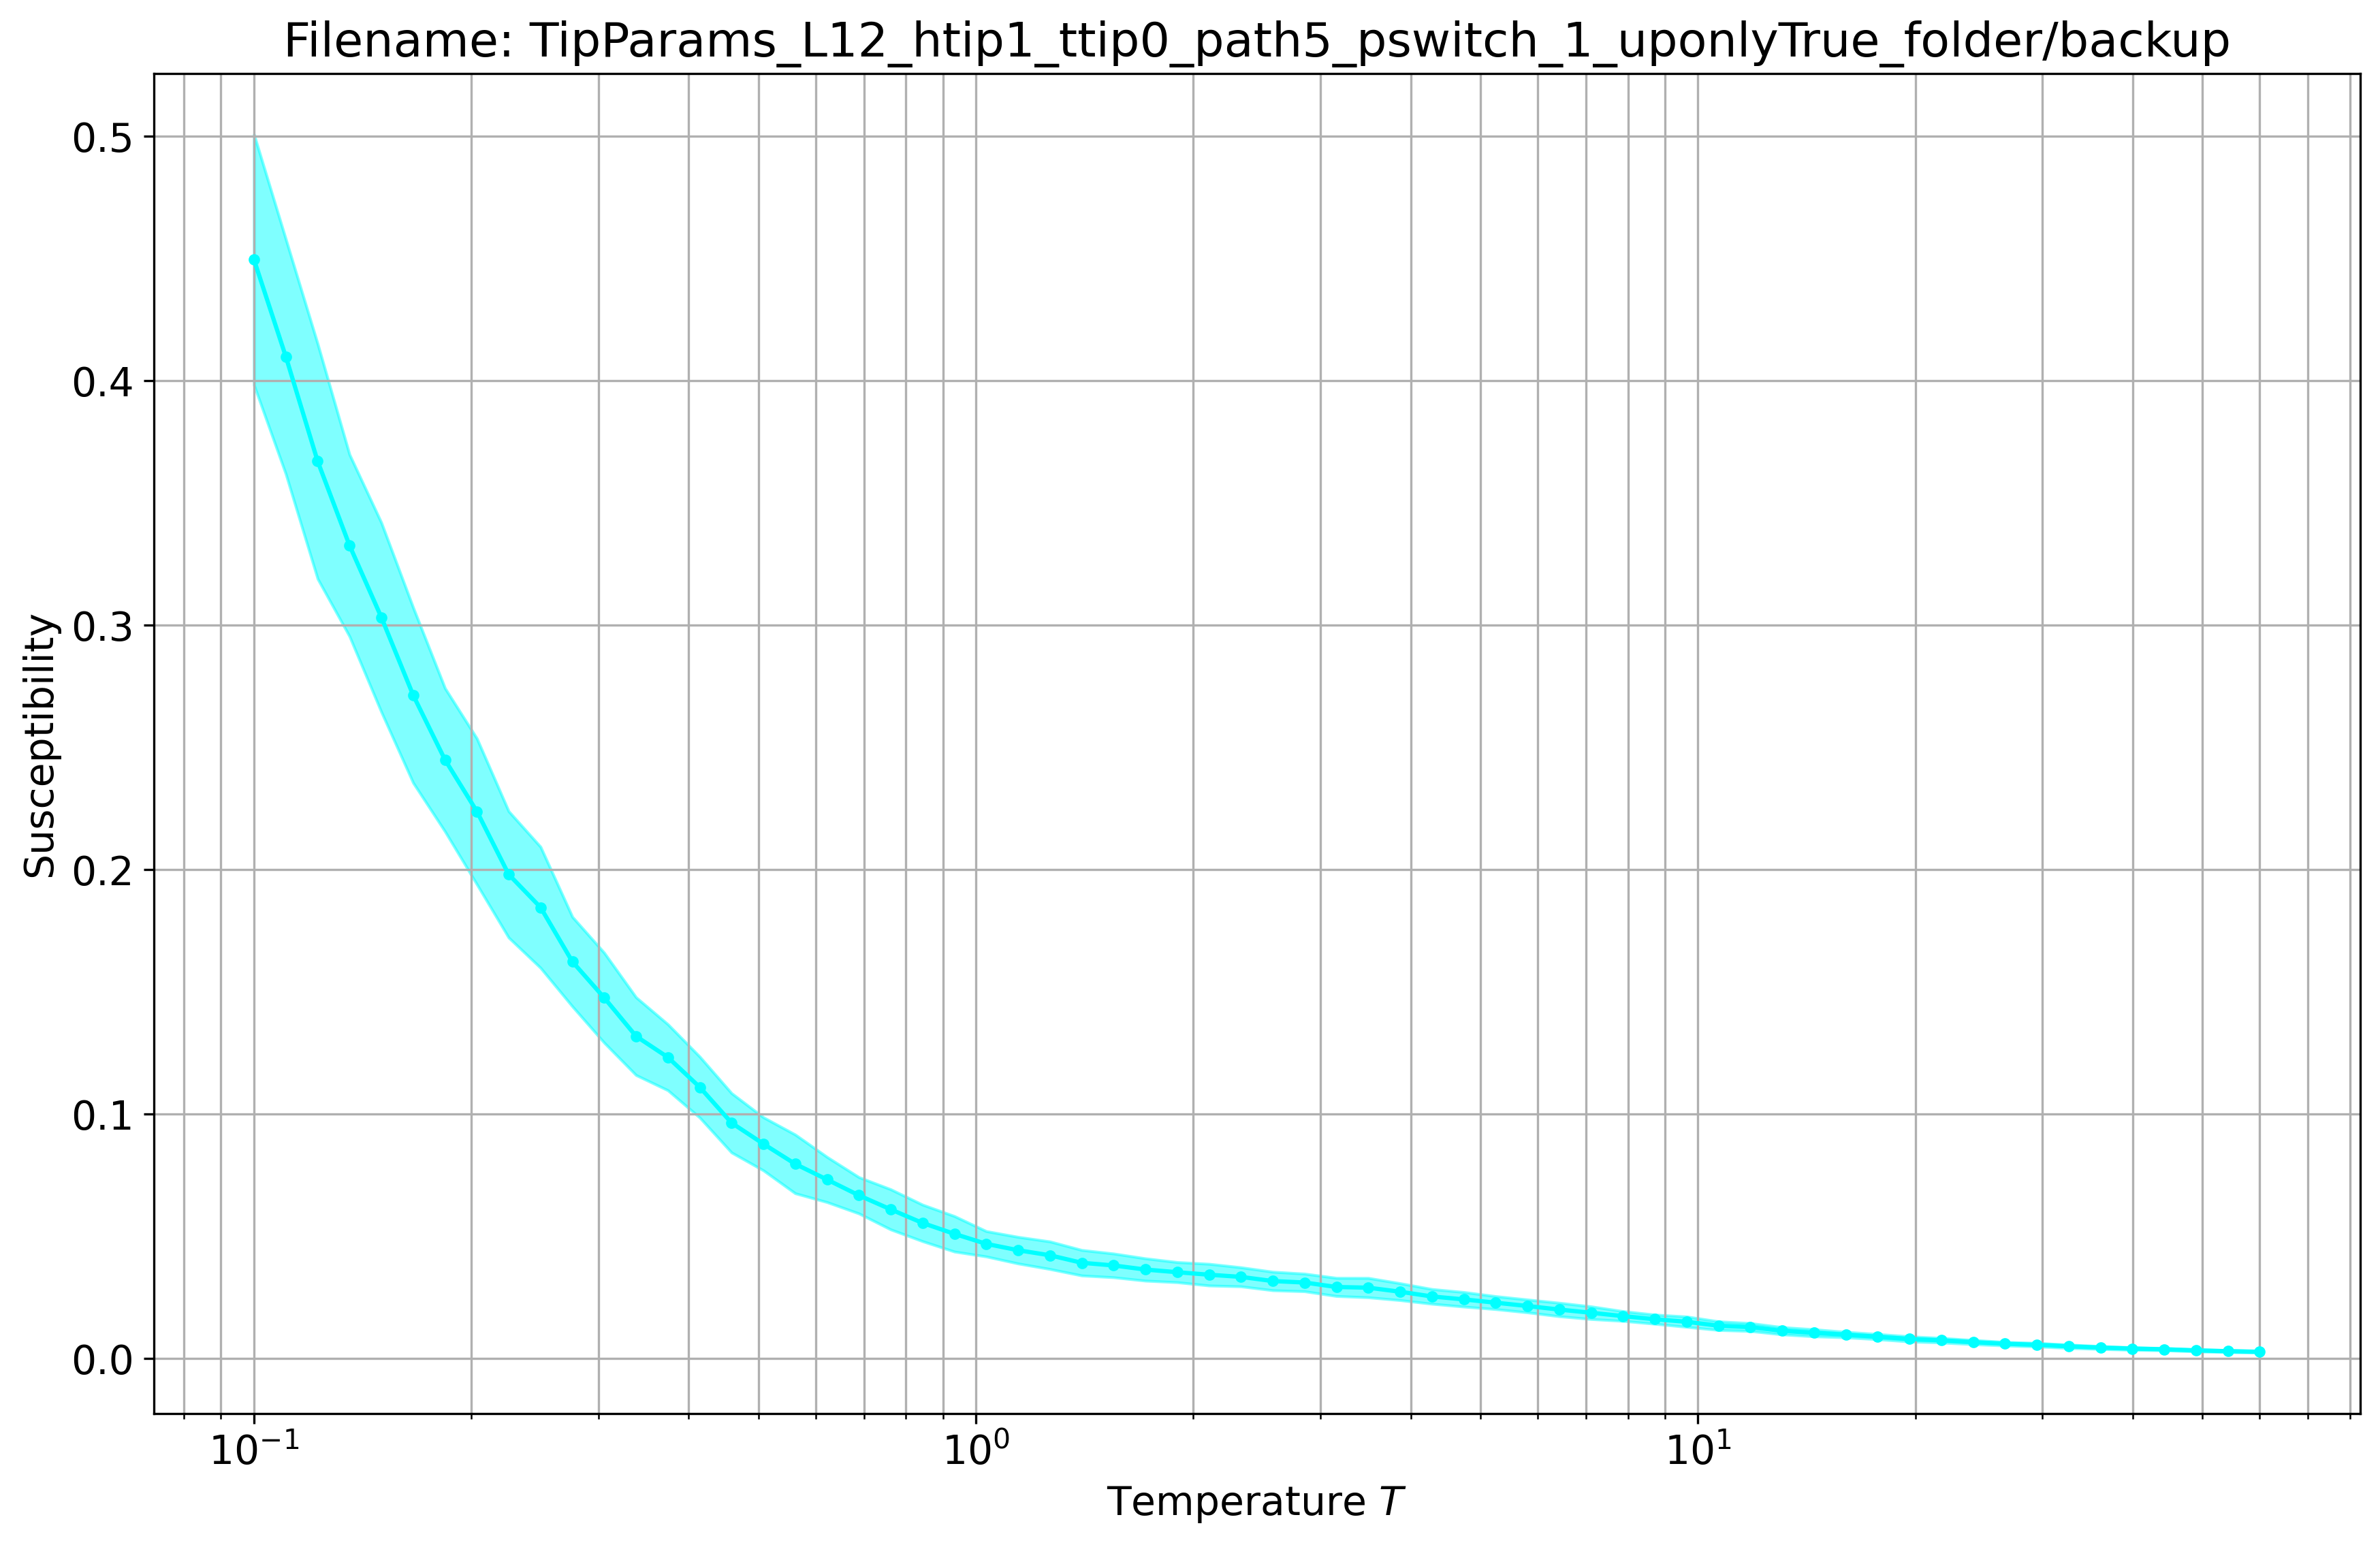

In [9]:
###########################################
        ## MAGNETISATION ANALYSIS ##
###########################################

for i in range(n):
    addsave = "ht={0}_Ttip={1}_uponly={2}_pswitch={3}_path={4}_L={5}".format(
        htip[i],Ttip[i], uponly[i], pswitch[i], path[i], L[i]);
    kw = {'expm': 0.193, 'expmerr': 0.05, 'addsave': addsave}
    af.BasicPlotsM(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                    results_foldername, filenamelist, t_h_MeanM, t_h_MeanMsq, t_h_varMeanM,
                    t_h_varMeanMsq, Chi, ErrChi, J1, J2, J3, J4, **kw)
plt.show()

In [10]:
###########################################
    ## Correlations load and analysis ##
###########################################

In [11]:
rmmag = True
kw = {'rmmag':rmmag}

In [12]:
t_h_MeanFc, t_h_varMeanFc, t_h_MeanSi, t_h_varMeanSi= \
 af.LoadFirstCorrelations(foldername, filenamelist, listfunctions,stat_temps, stat_hfields, nb, t_h_varMeanMsq, **kw)

(64, 1, 4)
(64, 1, 576)
(64, 1, 4)
(64, 1, 1296)


In [13]:
t_h_MeanSs, t_h_varMeanSs, t_h_MeanSi, t_h_varMeanSi, t_h_MeanCorr, t_h_errCorrEstim = \
 af.LoadCentralCorrelations(foldername, filenamelist, listfunctions, sref, stat_temps, stat_hfields, nb, **kw)
print(t_h_errCorrEstim[0].shape)
print(t_h_MeanFc[0].shape)

(3, 64, 1, 576)
(64, 1, 4)


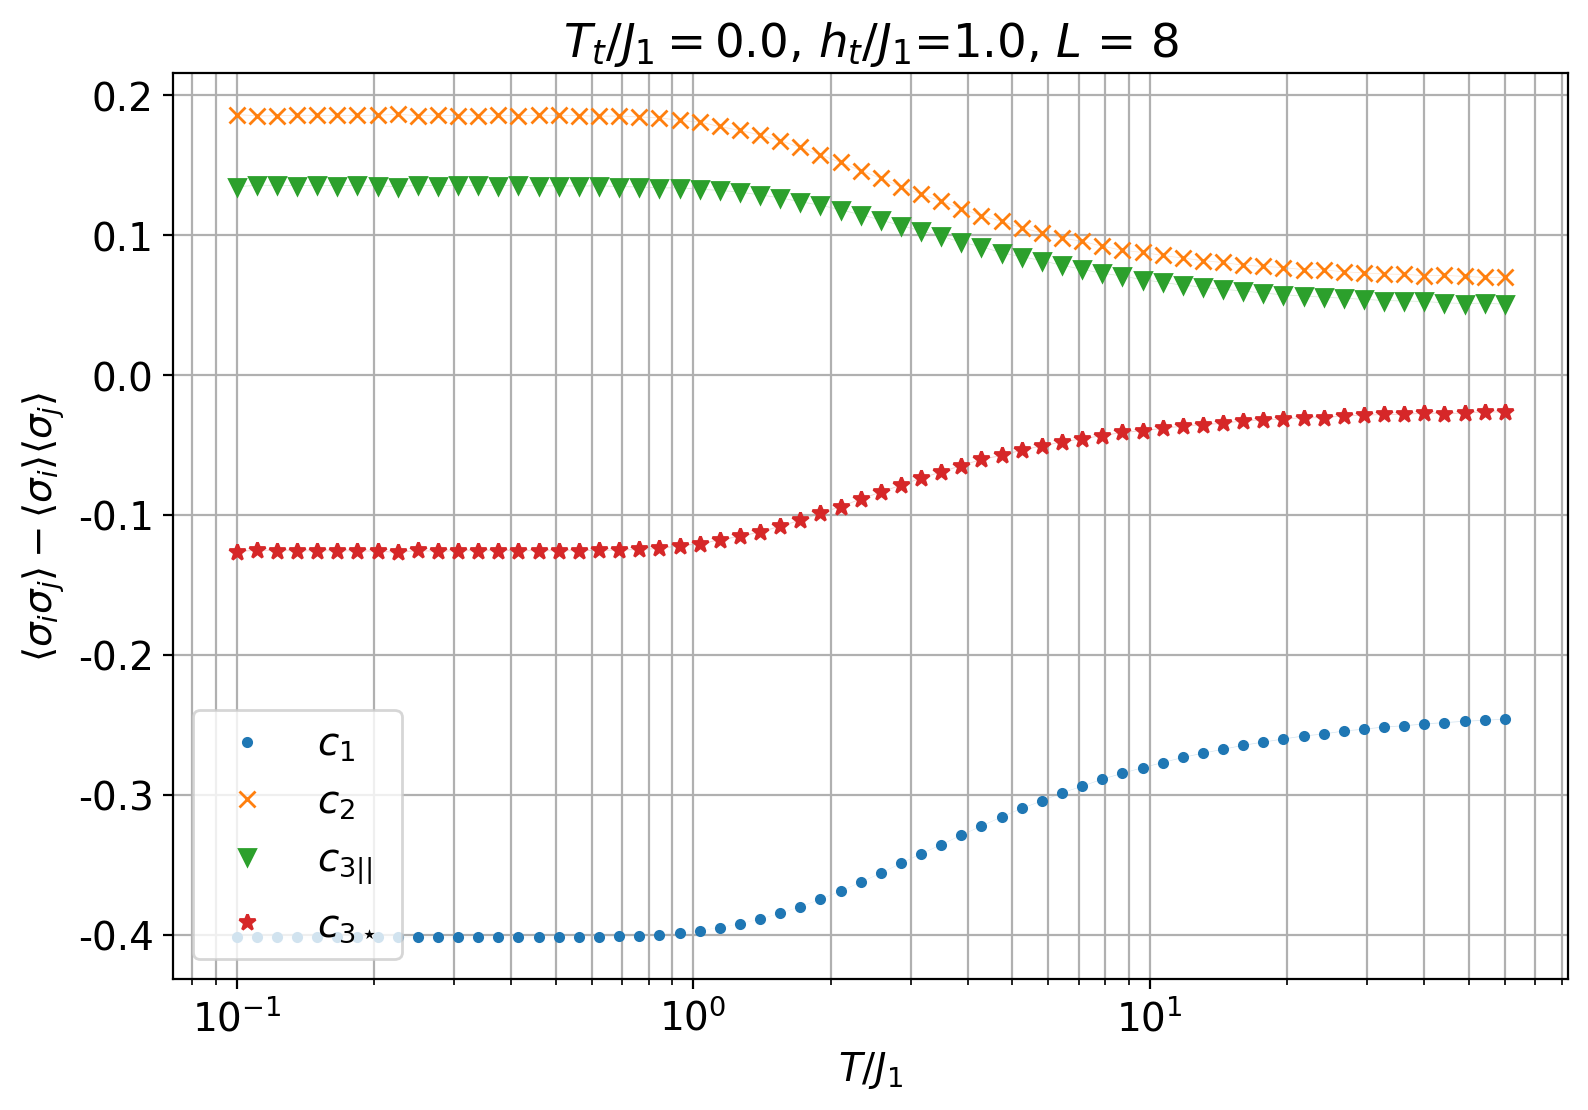

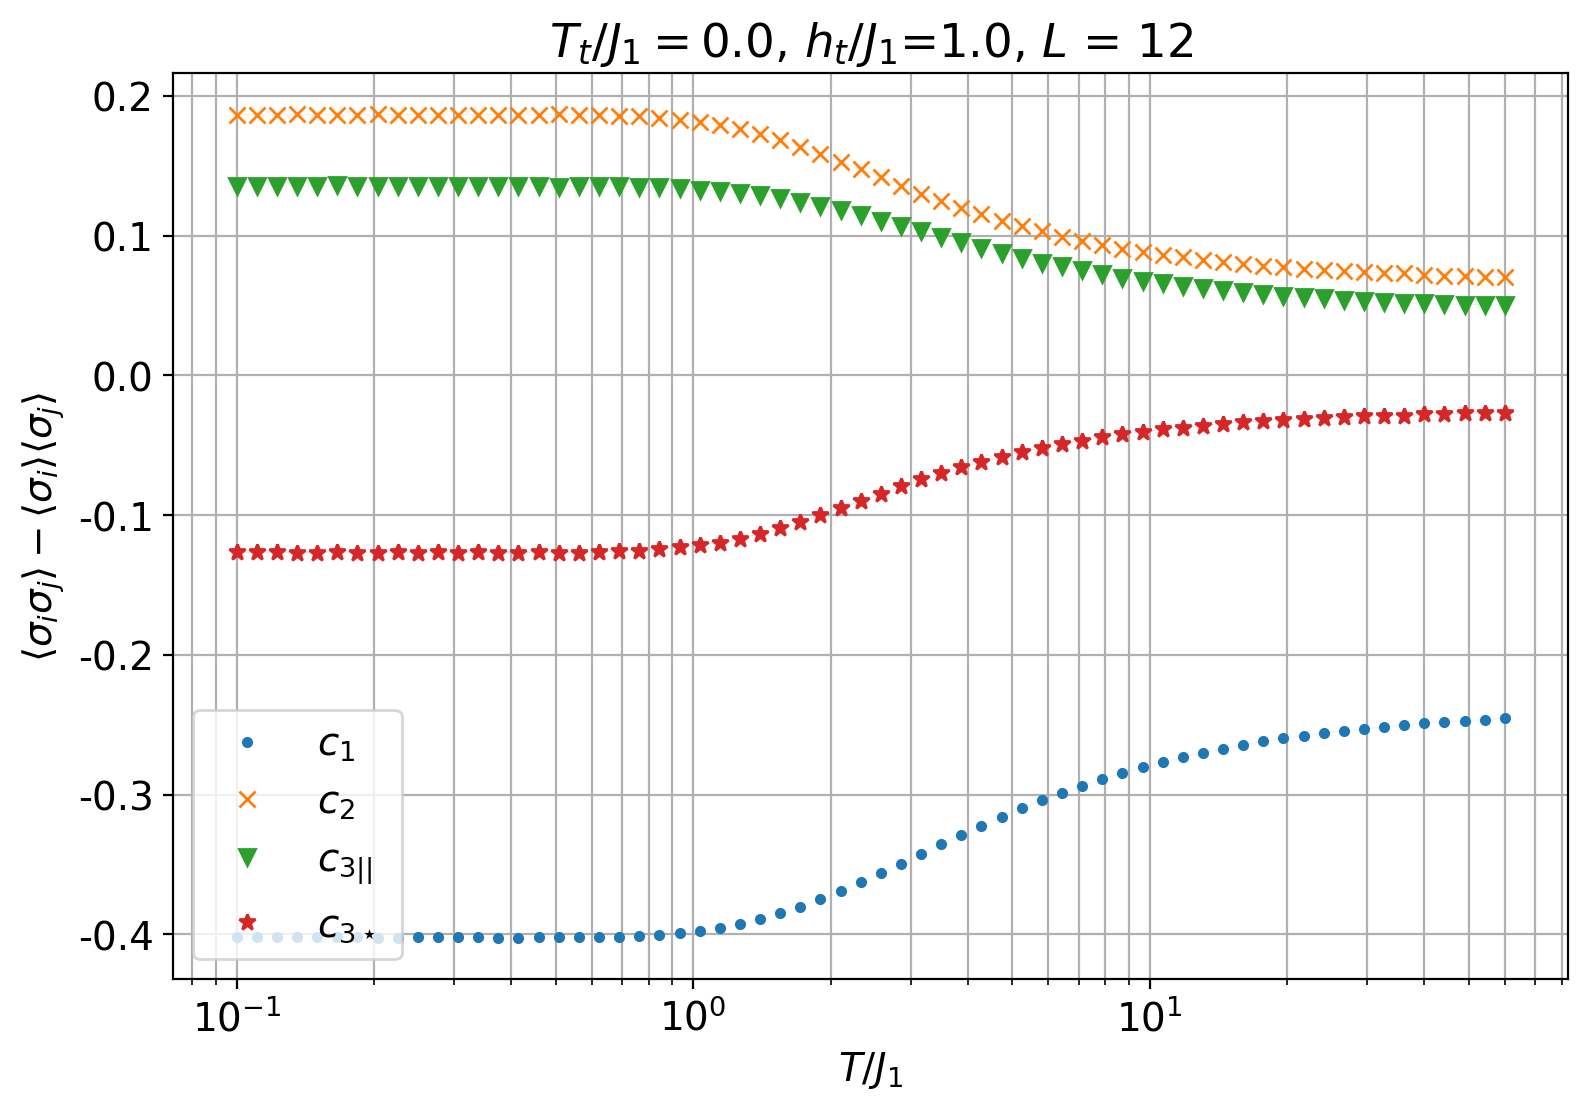

In [14]:
for i in range(n):
    addsave = "ht={0}_Ttip={1}_uponly={2}_pswitch={3}_path={4}_L={5}".format(
        htip[i],Ttip[i], uponly[i], pswitch[i], path[i], L[i]);
    addtitle = r"$T_{t}/J_1=$"+"{0},".format(Ttip[i])+r" $h_{t}/J_1$=" +"{0}, $L$ = {1}".format(htip[i], L[i]);

        
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, 
                                   foldername, results_foldername, 
                                   filenamelist, tmin = 0, 
                                   setyticks = None,
                                   addtitle = addtitle, addsave = addsave,
                                   save = True, log = True,
                                   figsize=(9,6), dpi = 200)

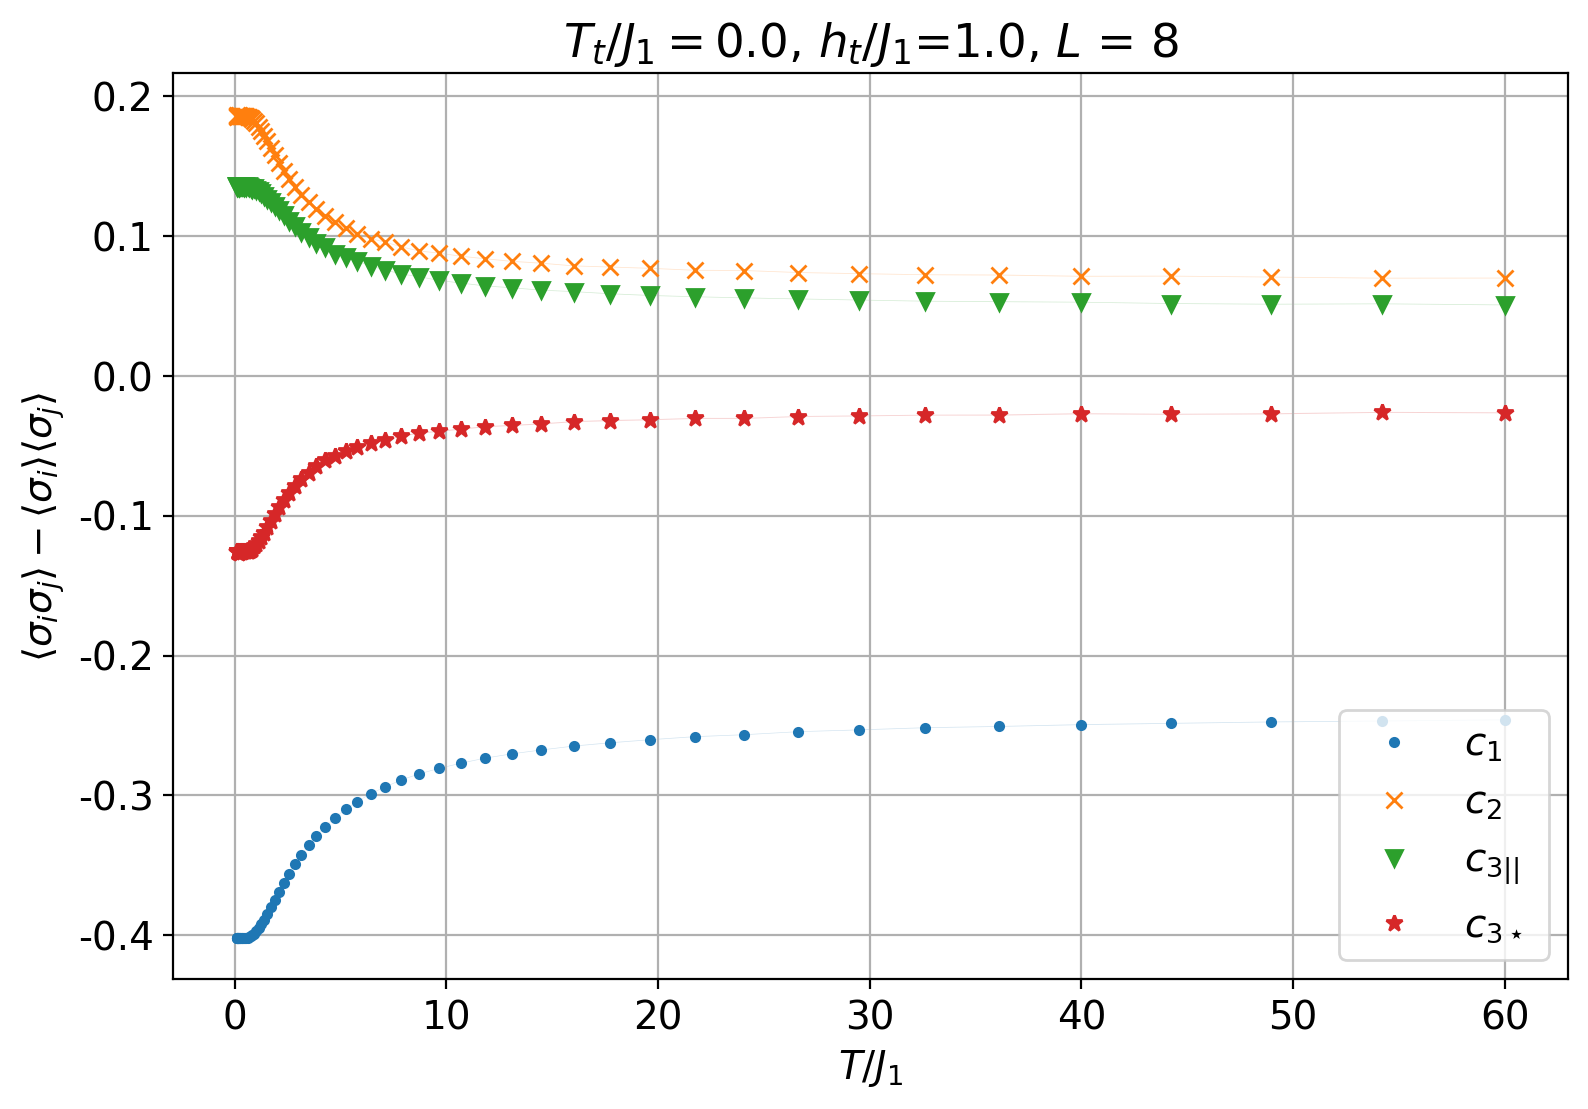

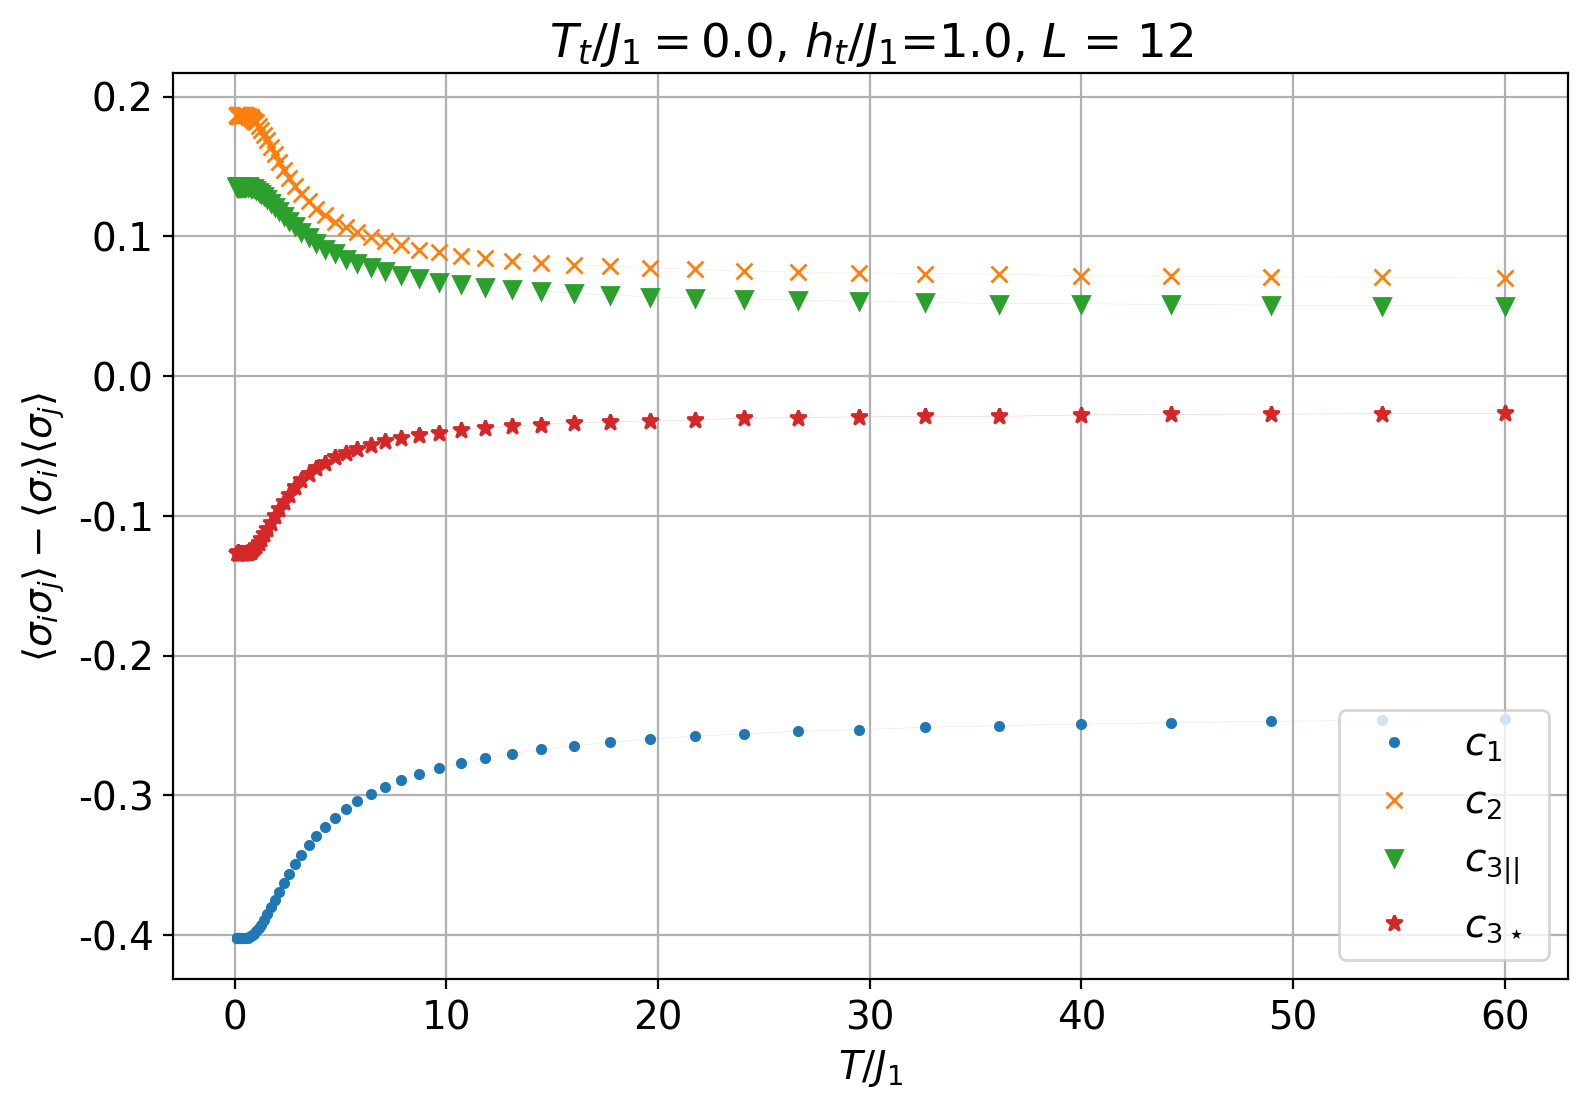

In [15]:
for i in range(n):
    addsave = "ht={0}_Ttip={1}_uponly={2}_pswitch={3}_path={4}_L={5}".format(
        htip[i],Ttip[i], uponly[i], pswitch[i], path[i], L[i]);
    addtitle = r"$T_{t}/J_1=$"+"{0}".format(Ttip[i])+r", $h_{t}/J_1$=" +"{0}, $L$ = {1}".format(htip[i], L[i]);

        
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, 
                                   foldername, results_foldername, 
                                   filenamelist, tmin = 0, 
                                   setyticks = None,
                                   addtitle = addtitle, addsave = addsave,
                                   save = True, log = False,
                                   figsize=(9,6), dpi = 200)

In [16]:
# Introducing the experimental values for the plots below:
## <sisj>-<si><sj>:
NN1exp = -0.22;
NN1experr = 0.0097;
NN2exp = 0.021;
NN2experr = 0.009;
NN3pexp = 0.065;
NN3pexperr = 0.012;
NN3sexp = -0.001;
NN3sexperr = 0.011;

mexp = -0.193;

rmexpmag = True

if not rmexpmag:
    NN1exp += mexp**2;
    NN2exp += mexp**2;
    NN3pexp += mexp**2;
    NN3sexp += mexp**2;
    

print(NN1exp)
print(NN2exp)
print(NN3pexp)
print(NN3sexp)

-0.22
0.021
0.065
-0.001


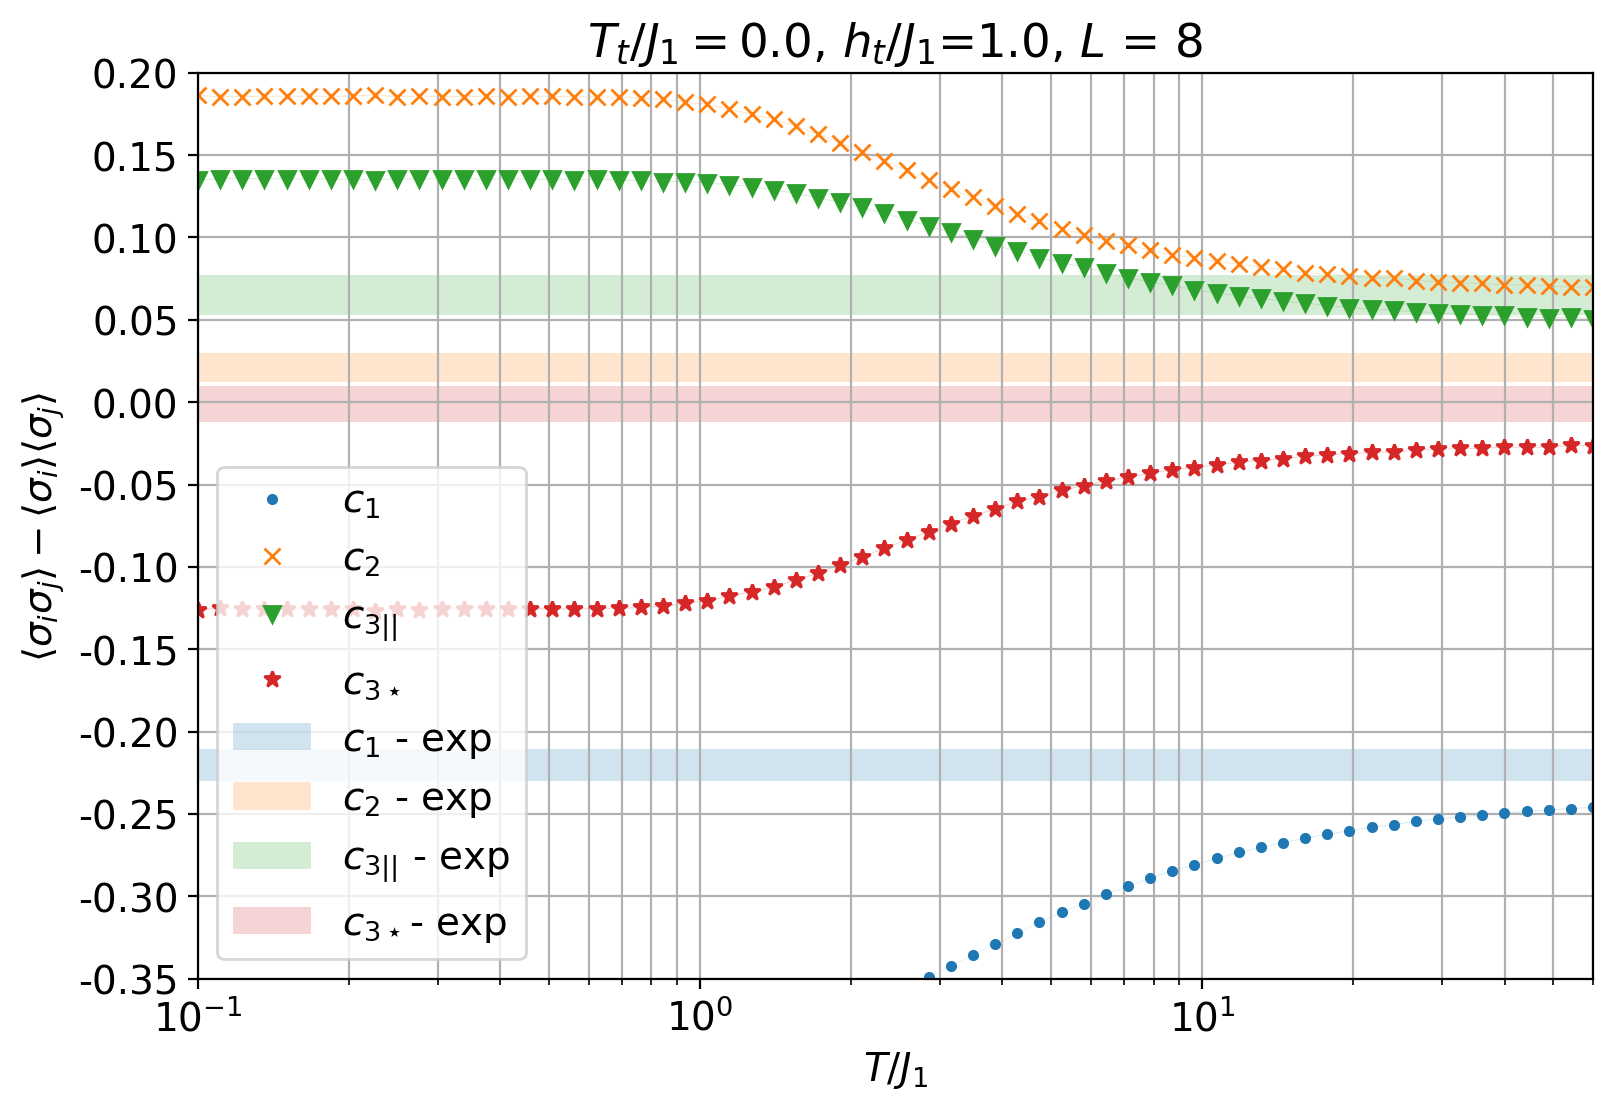

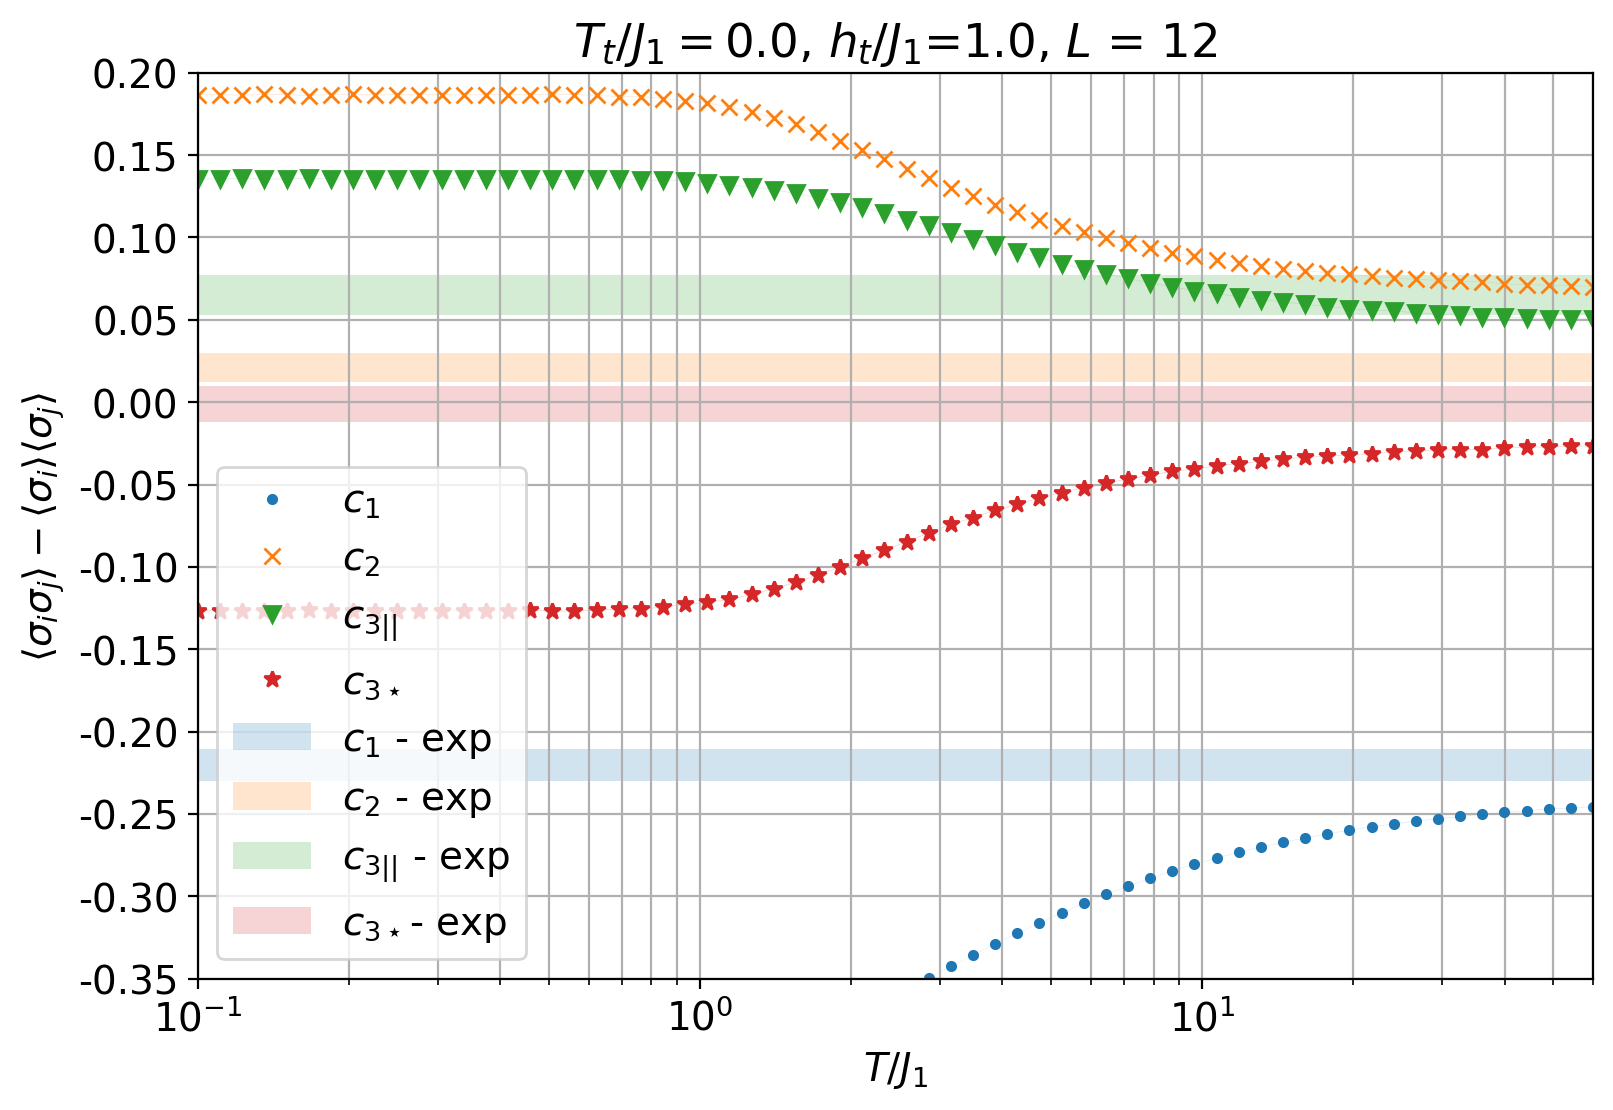

In [17]:
for i in range(n):
    addsave = "ht={0}_Ttip={1}_uponly={2}_pswitch={3}_path={4}_L={5}".format(
        htip[i],Ttip[i], uponly[i], pswitch[i], path[i], L[i]);
    addtitle = r"$T_{t}/J_1=$"+"{0}".format(Ttip[i])+r", $h_{t}/J_1$=" +"{0}, $L$ = {1}".format(htip[i], L[i]);

        
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, 
                                   foldername, results_foldername, 
                                   filenamelist, tmin = 0, 
                                   setyticks = None,
                                   addtitle = addtitle, addsave = addsave,
                                   save = True, log = True,
                                   figsize=(9,6), dpi = 200)
    plt.gca().set_prop_cycle(None)
    plt.fill_between([1e-3,60],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = r'$c_1$ - exp')
    plt.fill_between([1e-3,60],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2, label = r'$c_2$ - exp')
    plt.fill_between([1e-3,60],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2, label = r'$c_{3||}$ - exp')
    plt.fill_between([1e-3,60],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2, label = r'$c_{3\star}$- exp')
    plt.xlim([0.1, 60])
    plt.ylim([-0.35, 0.2])
    plt.yticks(np.arange(-0.35,0.25,0.05))
    plt.legend()
    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.png".format(rmexpmag))

In [18]:
ploth = False

[-0.40217635  0.1913798   0.13233328 -0.13120392]
[-0.40187437  0.18964217  0.13335167 -0.13047552]


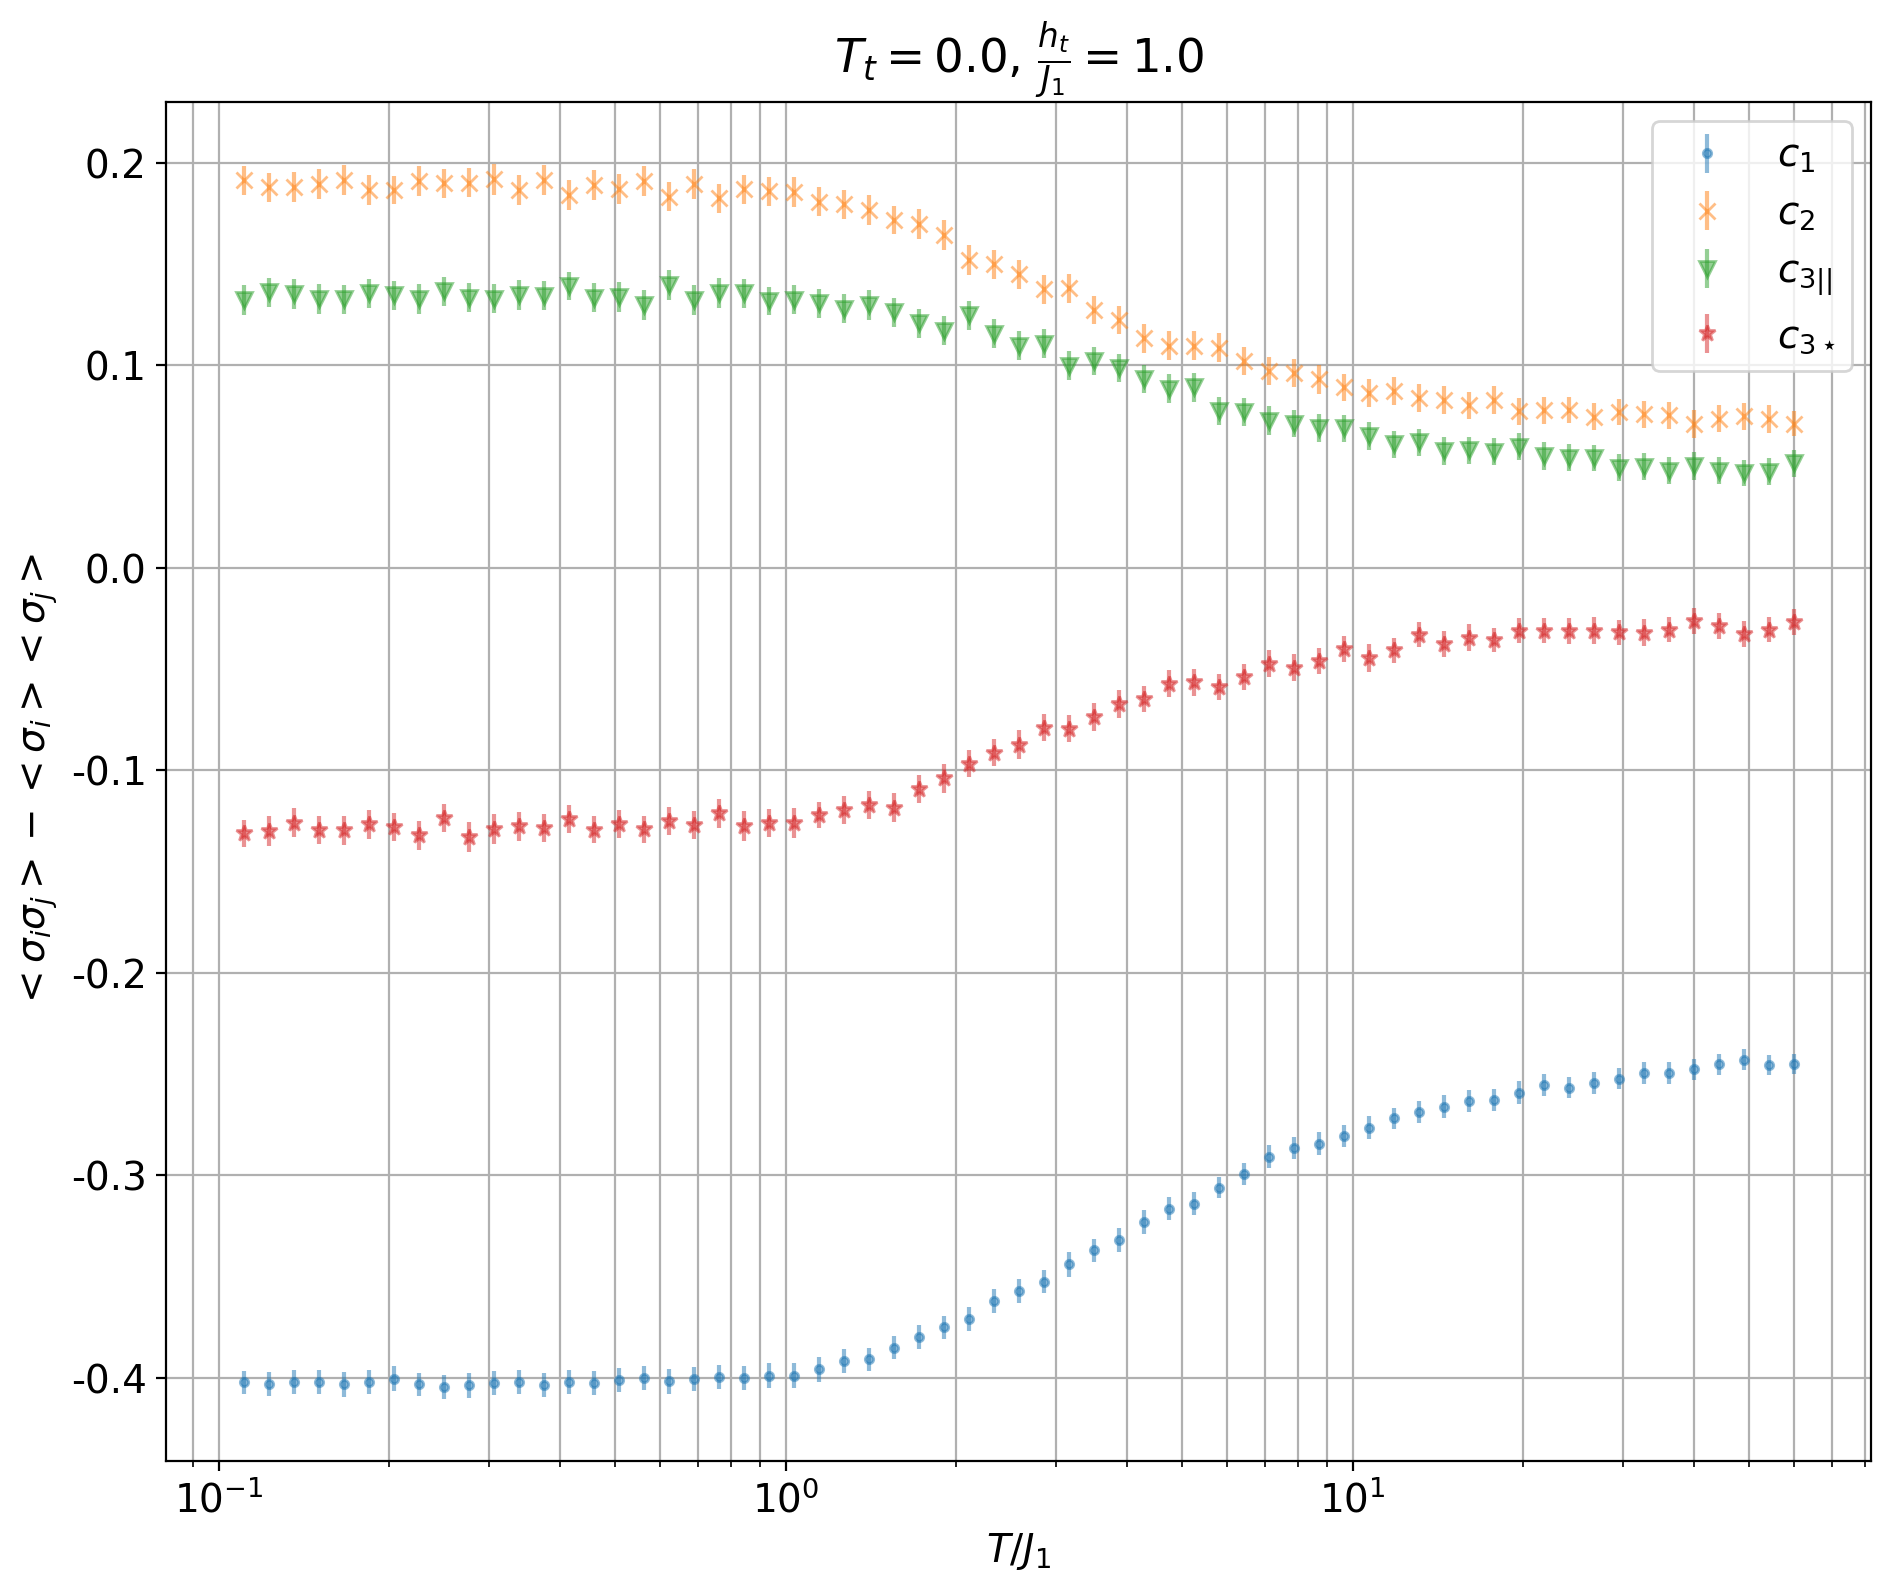

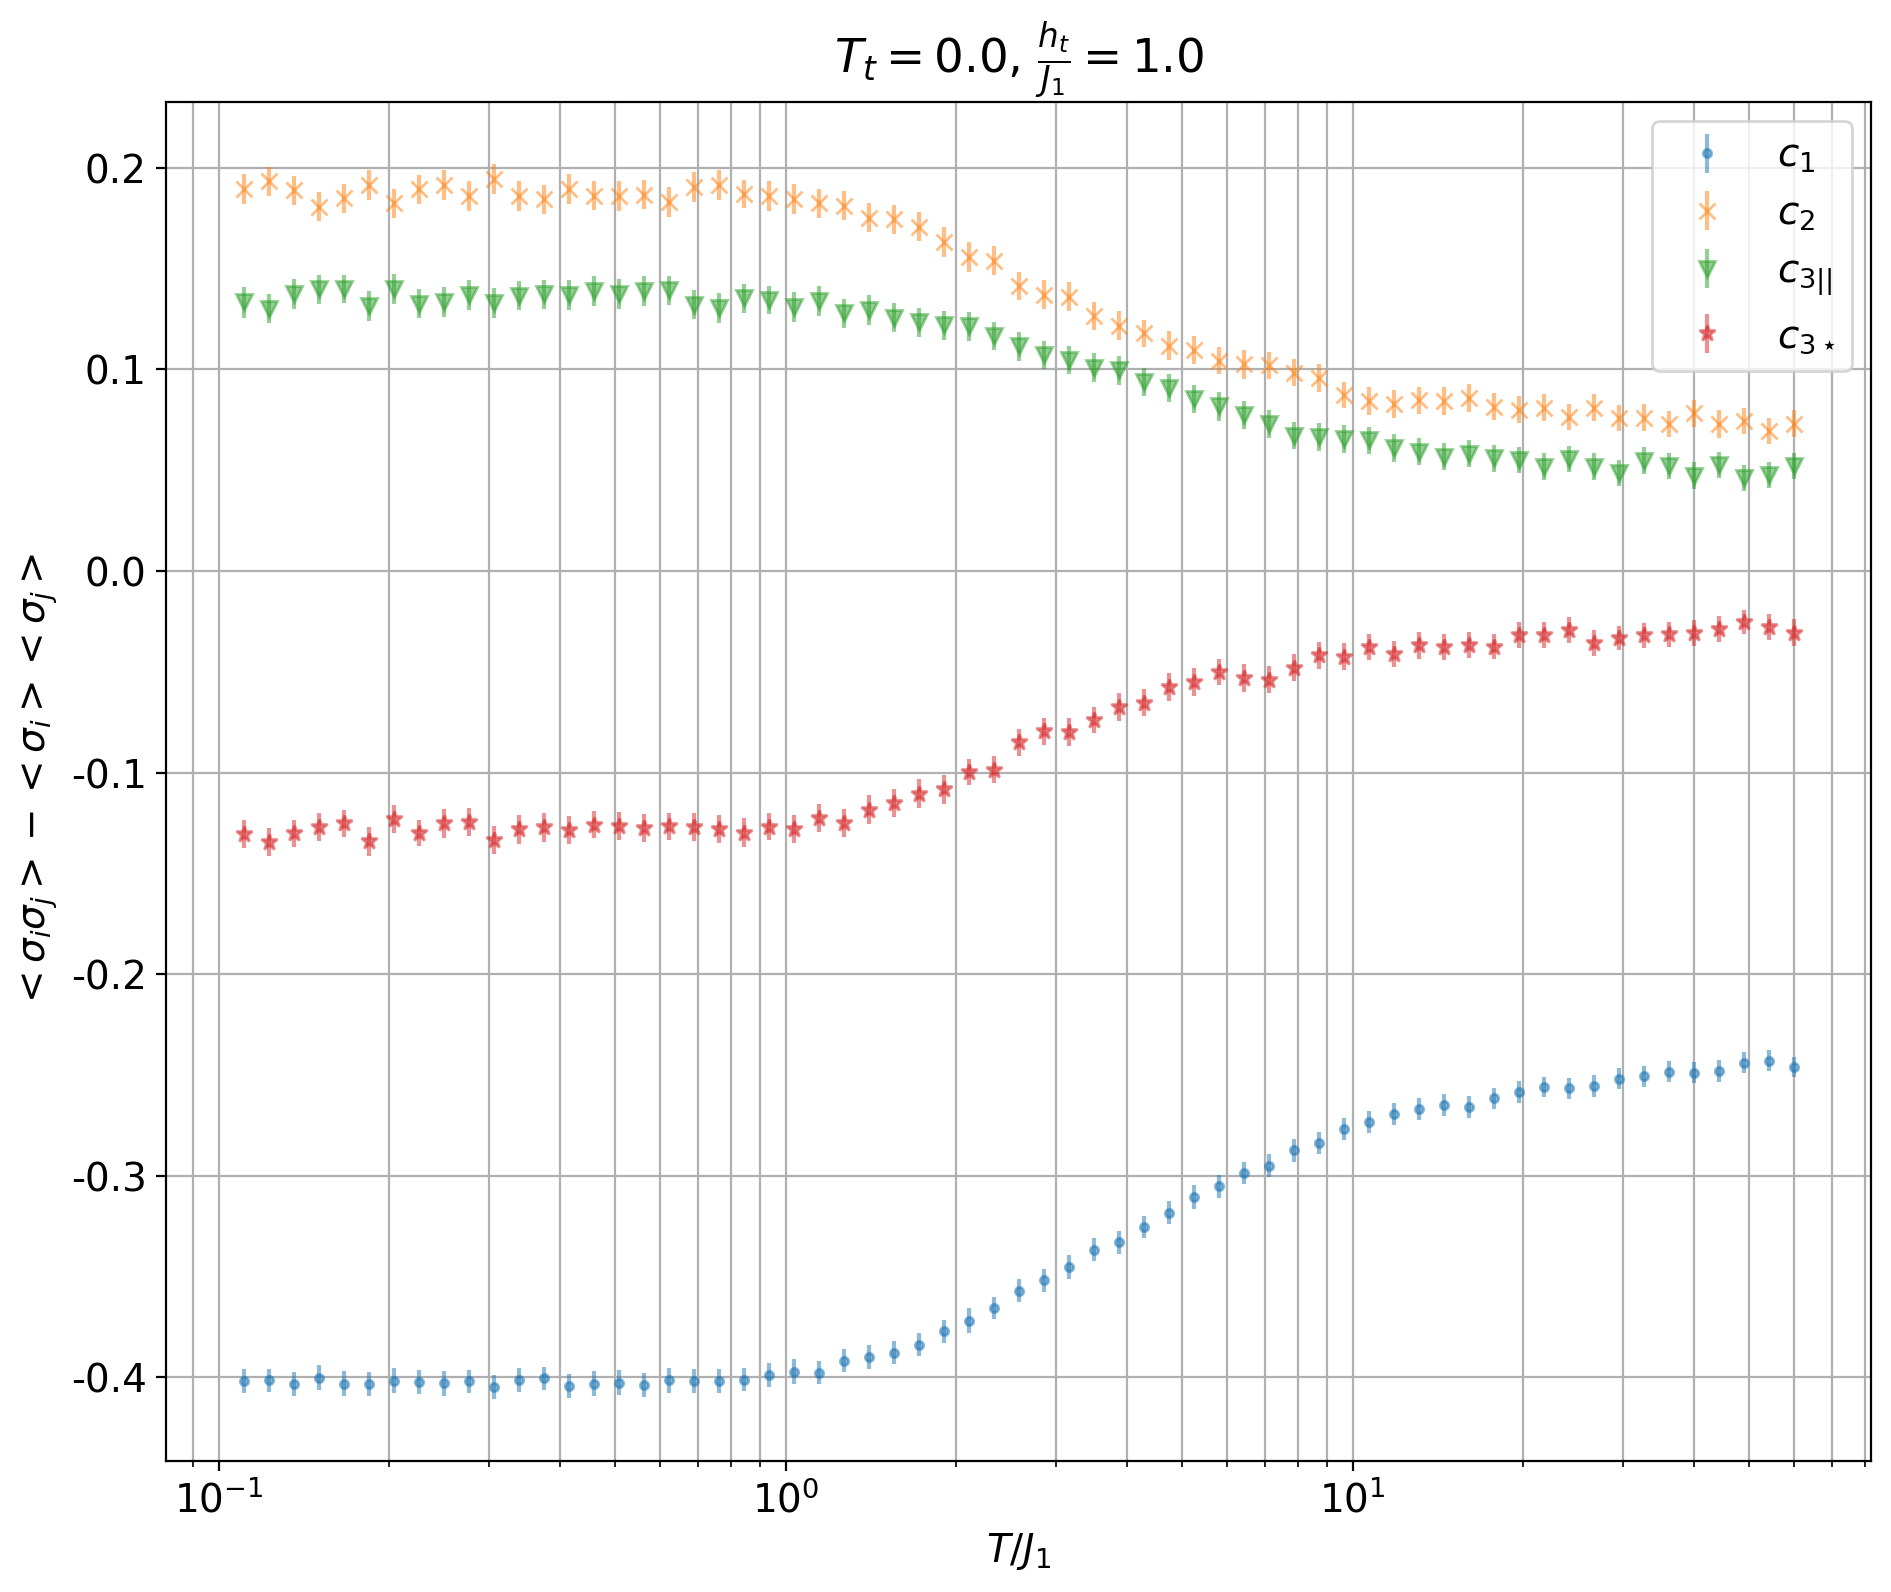

In [19]:
for i in range(n):
    addsave = "ht={0}_Ttip={1}_uponly={2}_pswitch={3}_path={4}_L={5}".format(
        htip[i],Ttip[i], uponly[i], pswitch[i], path[i], L[i]);
    af.PlotFirstCorrelations(i, L,foldername, results_foldername,  hfields_plots, temperatures_plots,
                             t_h_MeanCorr, t_h_errCorrEstim, sref, \
                             distmax = 2, ploth = ploth, plotFirst = False,
                            t_h_MeanFc = t_h_MeanFc, **kw)
    plt.title(r"$T_{t}=$"+"{0}".format(Ttip[i])+ ", "+ r"$\frac{h_{t}}{J_1}=$"+"{0}".format(htip[i]))
    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Central_"+ addsave +".png".format(i))

[-0.40217635  0.1913798   0.13233328 -0.13120392]
[-0.40187437  0.18964217  0.13335167 -0.13047552]


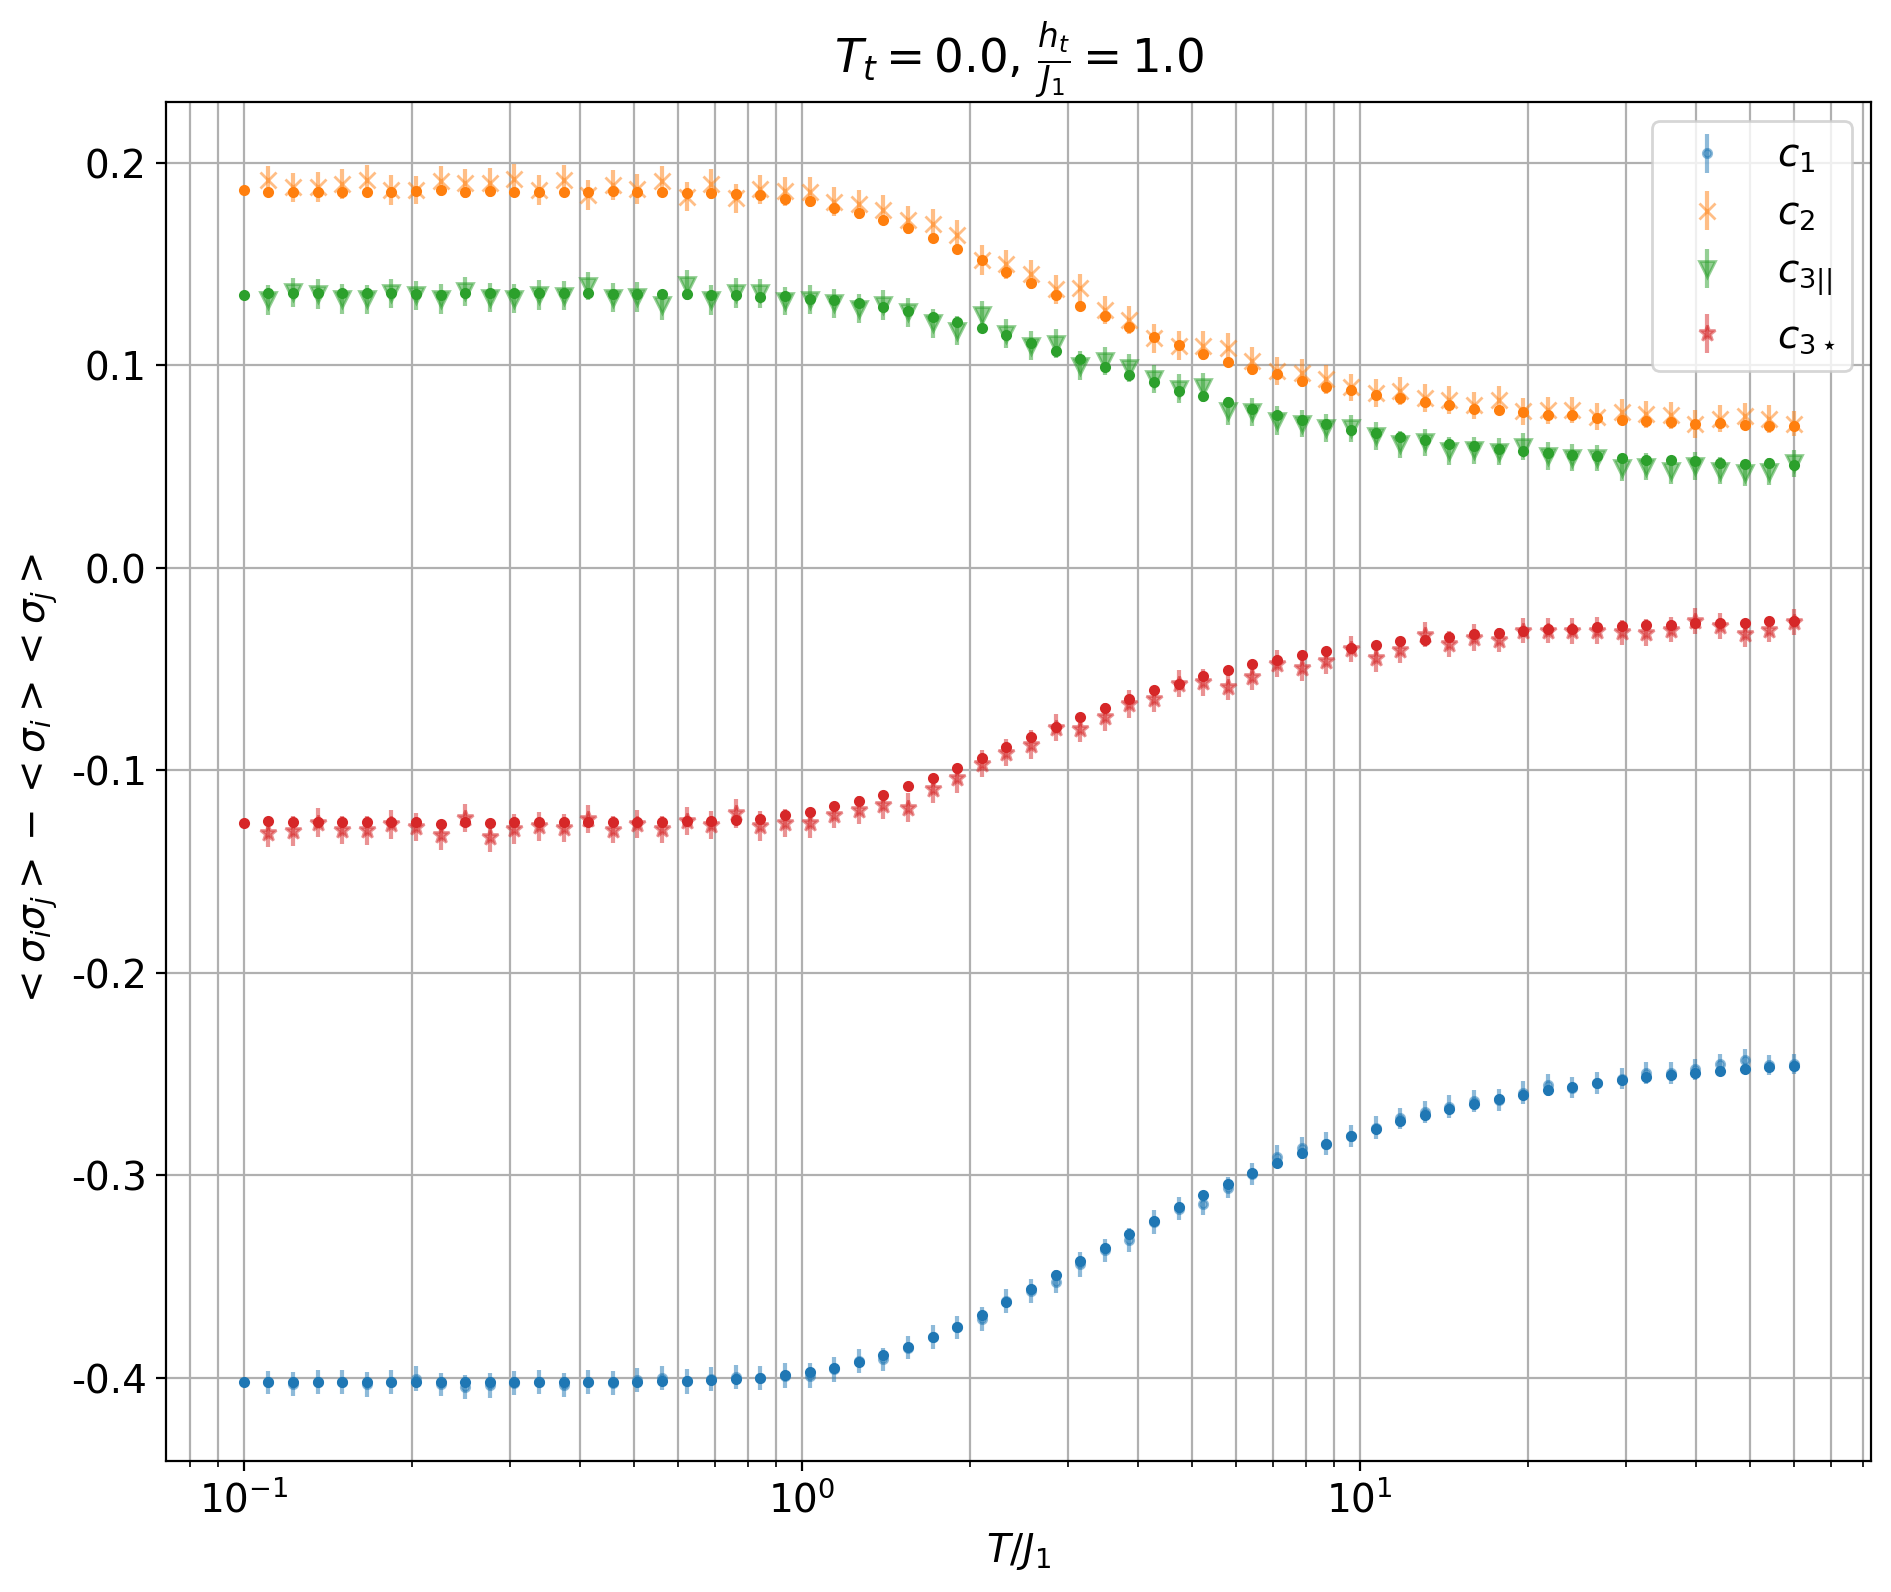

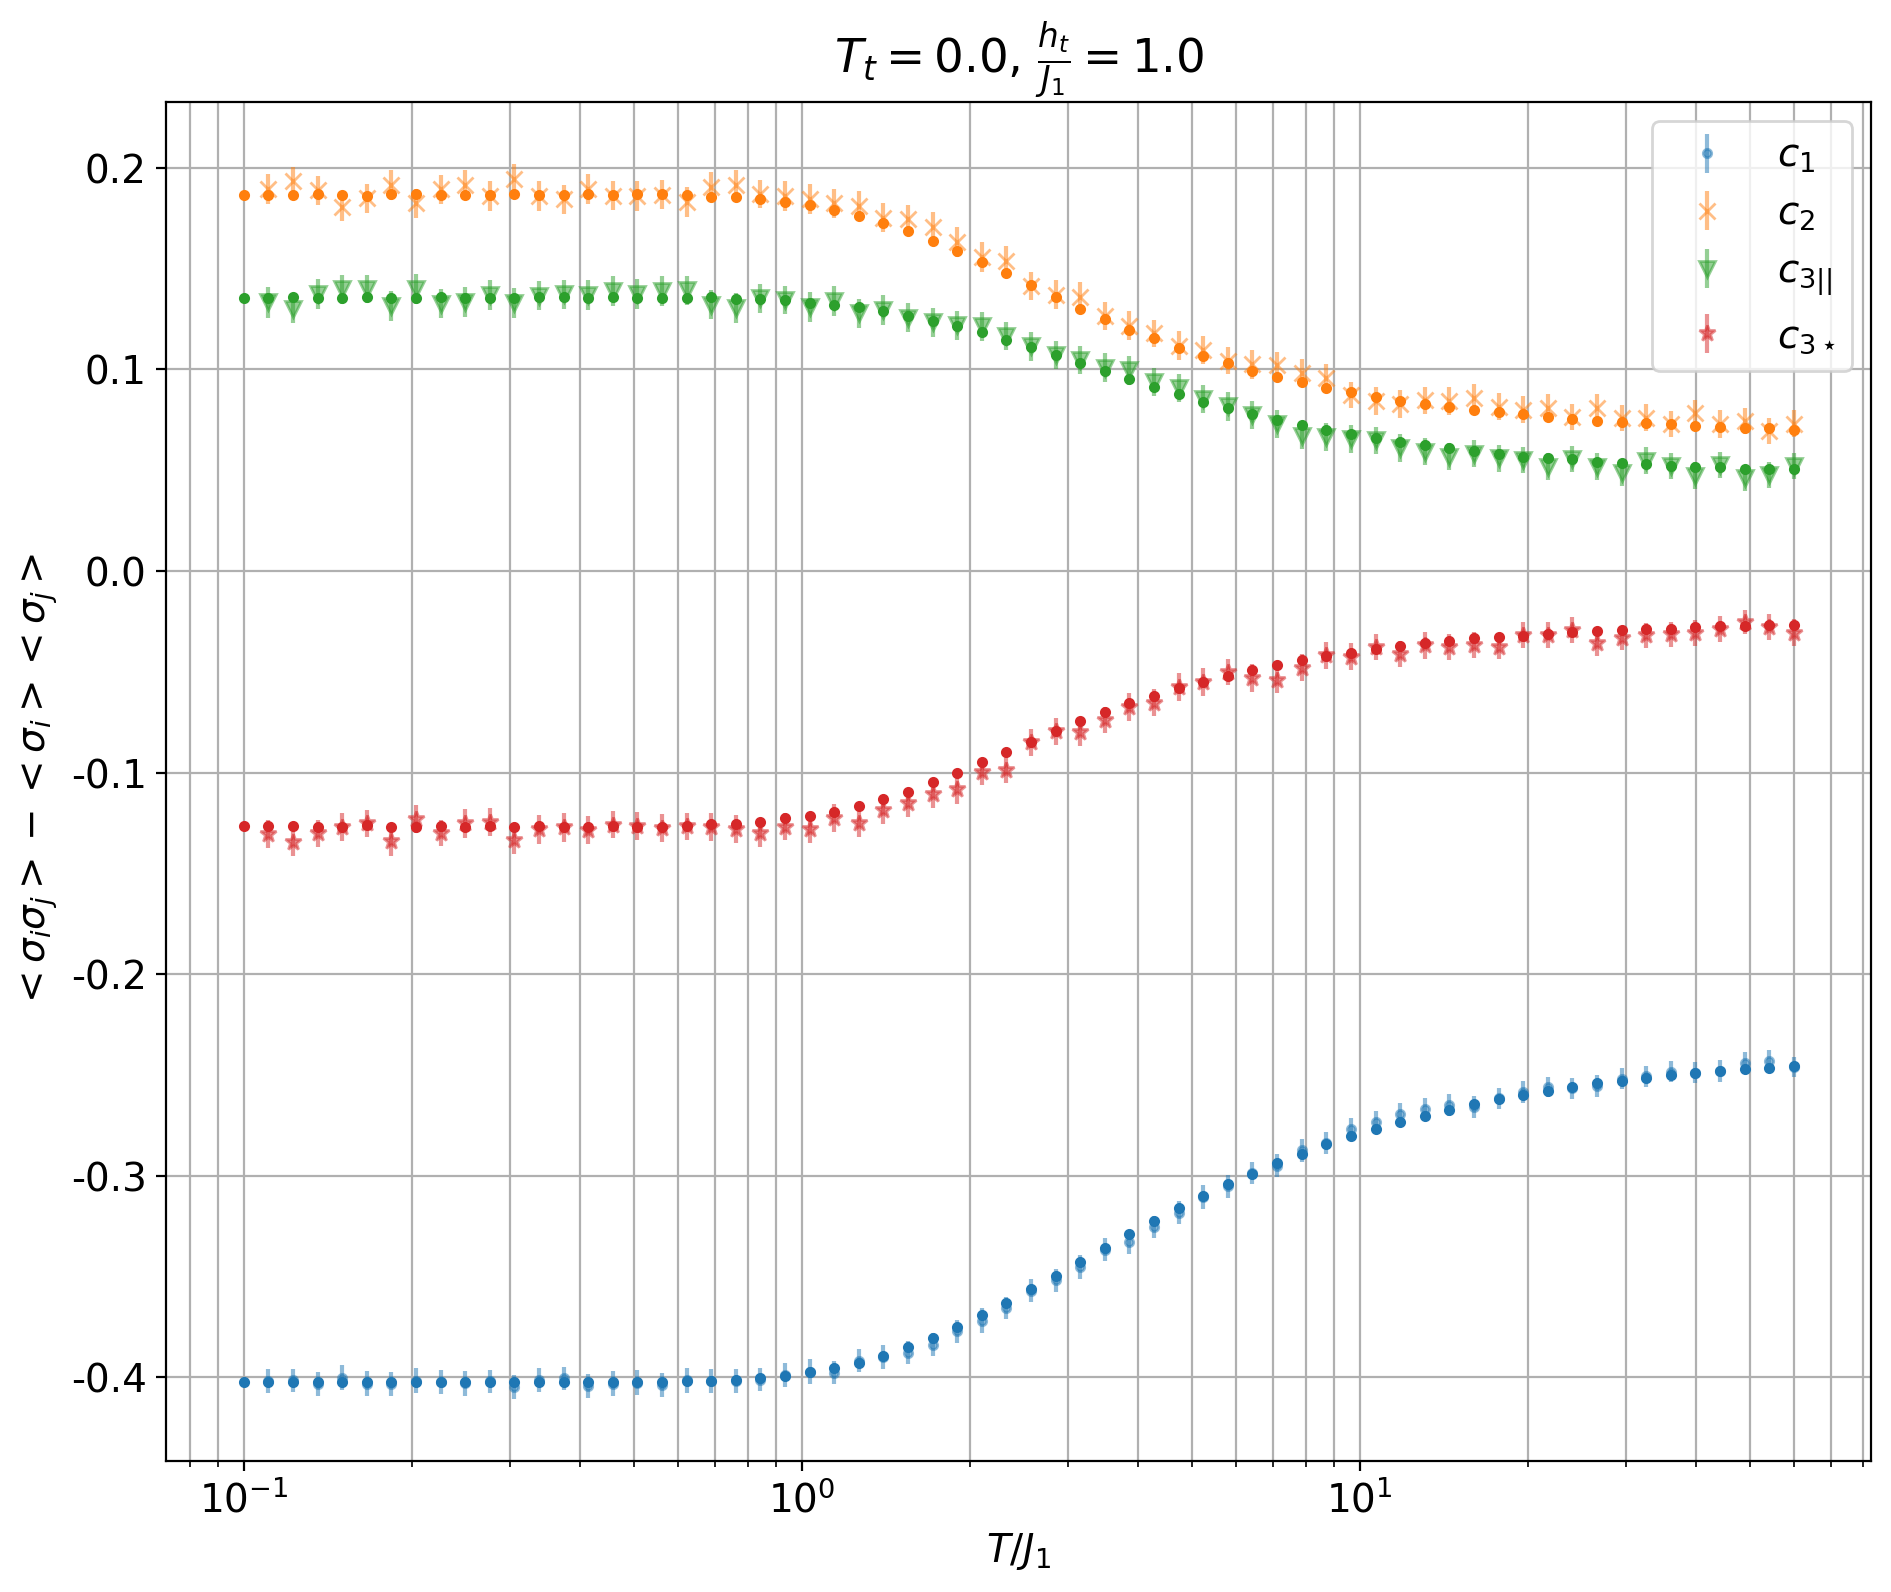

In [20]:
for i in range(n):
    addsave = "ht={0}_Ttip={1}_uponly={2}_pswitch={3}_path={4}_L={5}".format(
        htip[i],Ttip[i], uponly[i], pswitch[i], path[i], L[i]);
    af.PlotFirstCorrelations(i, L,foldername, results_foldername,  hfields_plots, temperatures_plots,
                             t_h_MeanCorr, t_h_errCorrEstim, sref, \
                             distmax = 2, ploth = ploth, plotFirst = True,
                            t_h_MeanFc = t_h_MeanFc, **kw)
    plt.title(r"$T_{t}=$"+"{0}".format(Ttip[i])+ ", "+ r"$\frac{h_{t}}{J_1}=$"+"{0}".format(htip[i]))
    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Comparison_"+addsave+".png")